Script: \
Total number of days below freezing from 2059 - 2069  \
starting from July - June

In [1]:
#import statements
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib import colorbar
import matplotlib.transforms as transforms
import cmocean
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#import os #Double check in a bit for the timeseries, average file
import math
import cmocean
import scipy.stats as stats

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [2]:
anomaly_cm = cmocean.cm.tarn
longest_cm = 'cmo.thermal'

sim='001'
temp = 313.15 #40*C = 313.15K

In [3]:
def return_longest_continuous_days(array,start_index,end_index):
    #time, lat lon
    longest_days = np.zeros([192,288])
    continuous = np.zeros([192,288])
    current_streak=np.zeros([192,288])


    for time in range(start_index,end_index):#len(ts['TS'].shape[0])):
        #go through lat
        if time%100 == 0:
            print("        ",time)
        for lat in range(0,192):
            #go through lon
            for lon in range(0,288):
                #if it is  Above 35$^o$C 
                if math.isnan(array[time,lat,lon]) == False: #check that it is not nan
                    if array[time,lat,lon] > temp:
                        #if it is continuous,
                        if continuous[lat,lon] == 1:
                            #to that point +=1
                            current_streak[lat,lon] +=1

                        #if it is not continuous: 
                        elif continuous[lat,lon] == 0:
                            #set continous to true
                            continuous[lat,lon] = 1
                            #+=1 to current streak
                            current_streak[lat,lon] = 1
                    else:
                        current_streak[lat,lon] = 0
                        continuous[lat,lon] = 0
                            #turn continous to false
                else:
                    longest_days[lat,lon] =np.nan
                if current_streak[lat,lon] > longest_days[lat,lon] and current_streak[lat,lon] !=1:
                        longest_days[lat,lon] = current_streak[lat,lon]

    return longest_days

In [4]:
#import ocean in order to isolate the land
ocean_data = '/glade/work/vgarza/arise_regrid/arise_20350101-20691231.nc'
ocean = xr.open_dataset(ocean_data)

cmap = cmocean.cm.thermal
land_data = np.zeros([ocean['SST'][0].shape[0],ocean['SST'][0].shape[1]])
land_data[:] = np.nan
land_data[np.isnan(ocean['SST'][0])== True] = 0

In [5]:
path = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'/atm/proc/tseries/day_1/'
dataFile = xr.open_mfdataset(path+'b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'.cam.h1.TS.*1960*' + '.nc')

In [6]:
1970 - 1850

120

In [7]:
dataFile['time']

<xarray.DataArray 'time' (time: 3650)>
array([cftime.DatetimeNoLeap(1960, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1960, 1, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1960, 1, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(1969, 12, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 12, 30, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 12, 31, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1960-01-01 00:00:00 ... 1969-12-31 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [8]:
year_increment = (0 + 0)
dataFile['time'][year_increment*365+181:year_increment*365+365+181]

<xarray.DataArray 'time' (time: 365)>
array([cftime.DatetimeNoLeap(1960, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1960, 7, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1960, 7, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(1961, 6, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1961, 6, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1961, 6, 30, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1960-07-01 00:00:00 ... 1961-06-30 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [9]:
cesm={}
cesm['001','002','003']  ={}

sim_array = ['001','002','003'] 


cesm_1960s_longest_days = []
#cesm_2015_longest_days = []

## Cut is so its only 2035 - 2069
for sim in sim_array: 
    print(sim)

    path = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'/atm/proc/tseries/day_1/'
    dataFile = xr.open_mfdataset(path+'b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'.cam.h1.TS.*1960*' + '.nc')
    
    cesm[sim] = np.array(dataFile['TS']-land_data) #get 2035-2069)
    cesm_time = dataFile['time']
    print('     Calculate Days Below Freezing')
    #Calculate the longest days
    for year in range(0,10):
        year_increment = 0 + year
        
        if year % 5 == 0:
          #  time = dataFile['time'][7116:20137]

            
            print("CESM: ")
            print(cesm_time[(year_increment)*365:year_increment*365+365][0])
            #print(cesm_time[(year_increment-1)*365+181:(year_increment-1)*365+365+181][0])
        #year_increment*365+181:year_increment*365+365+181

        cesm_1960s_longest_days.append(return_longest_continuous_days(cesm[sim],year_increment*365,year_increment*365+365))


001
     Calculate Days Below Freezing
CESM: 
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(1960, 1, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 1960-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds
         0
         100
         200
         300
         400
         500
         600
         700
         800
         900
         1000
         1100
         1200
         1300
         1400
         1500
         1600
         1700
         1800
CESM: 
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(1965, 1, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 1965-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds
         1900
         2000
         2100
         2200
         2300
         2400
         2500
         2600
         2700
         2800
         2900
         3000
         3100
         3200
         3300
         3400
 

In [10]:
#Over all mean of all simulations
cesm_1960s_longest_days_mean = np.mean(np.array(cesm_1960s_longest_days),axis = 0)

In [11]:
print(np.shape(cesm_1960s_longest_days))
print(np.shape(cesm_1960s_longest_days_mean))

(30, 192, 288)
(192, 288)


## Plotting: 

In [12]:
def plot_global(x,y,plot,levels,title,extend,cmap):
    #Nan out 0's so it doesn't show up on plot
    plot[plot==0] = np.nan
    
    fig,ax= plt.subplots(figsize =(13,19),facecolor='white',subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0))) # defining a figure
   
    plt.title(title)
    #ax.add_feature(cfeature.LAND, color = 'lightgray',zorder = 1) #adding land
    ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
    ax.set_global()  
    
    gl1 = ax.gridlines(ccrs.PlateCarree(),
              linestyle='-',
              y_inline=False, x_inline=False,
              color='grey', alpha=.5, linewidth=1, draw_labels=True)
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
     #plot the data
    p = ax.contourf(x, y,
                    plot,levels,extend=extend,
                    transform=ccrs.PlateCarree(),cmap=cmap)
    
    cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend=extend) # add a colorbar
    cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
    cbar.set_label('# Days')

    plt.show() 
    plt.close()
    

    
def plot_europe(x,y,plot,levels,title,extend,cmap):

    plot[plot==0] = np.nan
                    

    fig,ax= plt.subplots(figsize =(13,19),facecolor='white',subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0))) # defining a figure

    plt.title(title)

    ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
    ax.set_extent([-10,50,25,75],crs=ccrs.PlateCarree() ) 

    #plot the data
    p = ax.contourf(x, y,
                    plot,levels,extend=extend, #plot the surface
                    transform=ccrs.PlateCarree(),cmap=cmap)

    gl1 = ax.gridlines(ccrs.PlateCarree(),
                  linestyle='-',
                  y_inline=False, x_inline=False,
                  color='grey', alpha=.5, linewidth=1, draw_labels=True)
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
    cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = extend) # add a colorbar
    cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
    cbar.set_label('# Days')


    plt.show() 
    plt.close()
    
def plot_north_america(x,y,plot,levels,title,extend,cmap):
    plot[plot==0] = np.nan
                    

    fig,ax= plt.subplots(figsize =(13,19),facecolor='white',subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=0))) # defining a figure

    plt.title(title)

    ax.add_feature(cfeature.COASTLINE,zorder = 1) #adding a coastline
    ax.set_extent([-168,-52,25,75],crs=ccrs.PlateCarree() ) 

    #plot the data
    p = ax.contourf(x, y,
                    plot,levels,extend=extend, #plot the surface
                    transform=ccrs.PlateCarree(),cmap=cmap)

    gl1 = ax.gridlines(ccrs.PlateCarree(),
                  linestyle='-',
                  y_inline=False, x_inline=False,
                  color='grey', alpha=.5, linewidth=1, draw_labels=True)
    gl1.xformatter = LONGITUDE_FORMATTER
    gl1.yformatter = LATITUDE_FORMATTER
    
    cbar = plt.colorbar(p, orientation='horizontal', pad=0.05, fraction=0.05,ax=ax,extend = extend) # add a colorbar
    cbar.ax.tick_params(labelsize=23) #change the size of the ticks on the colorbar
    cbar.set_label('# Days')


    plt.show() 
    plt.close()

In [14]:
levels = np.arange(0,40,1)
anom_levs=np.arange(-10,11,1)


NA_levs = np.arange(0,40,1)
NA_anom_levs = np.arange(-8,9,1)

EU_levs = np.arange(0,40,1)
EU_anom_levs = np.arange(-8,9,1)

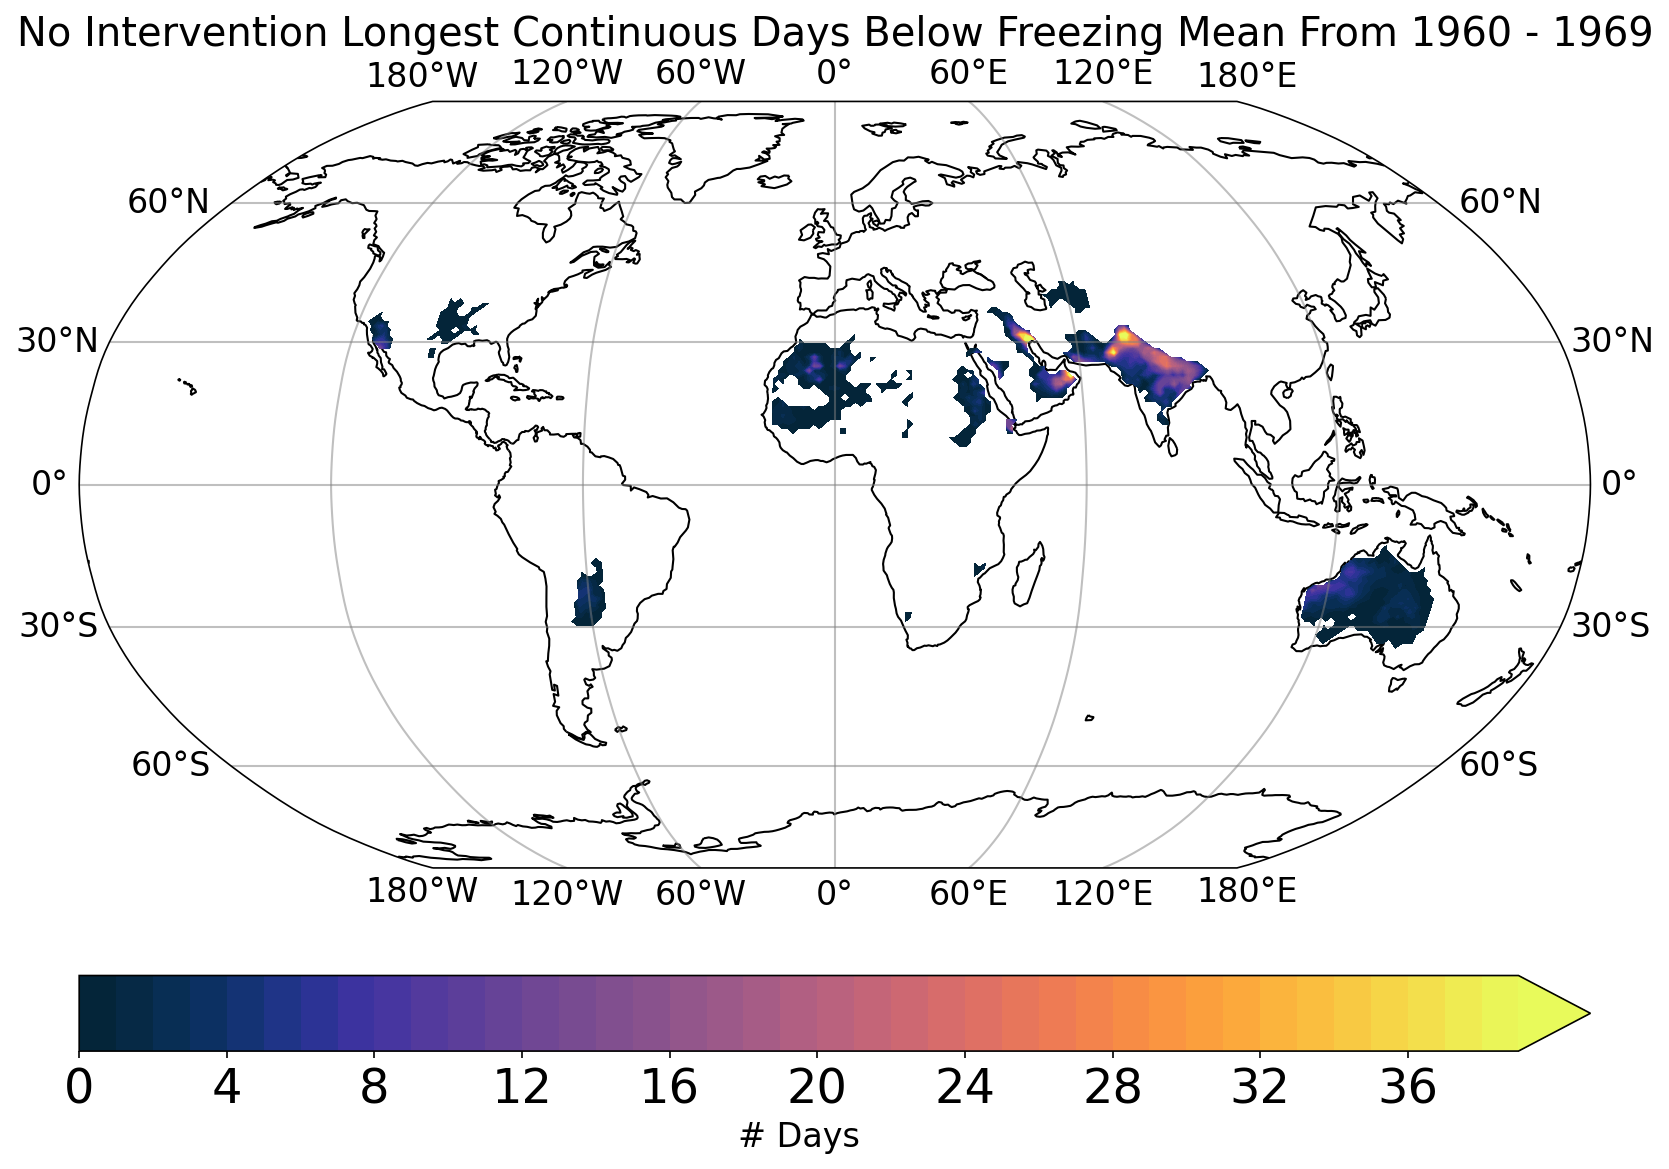

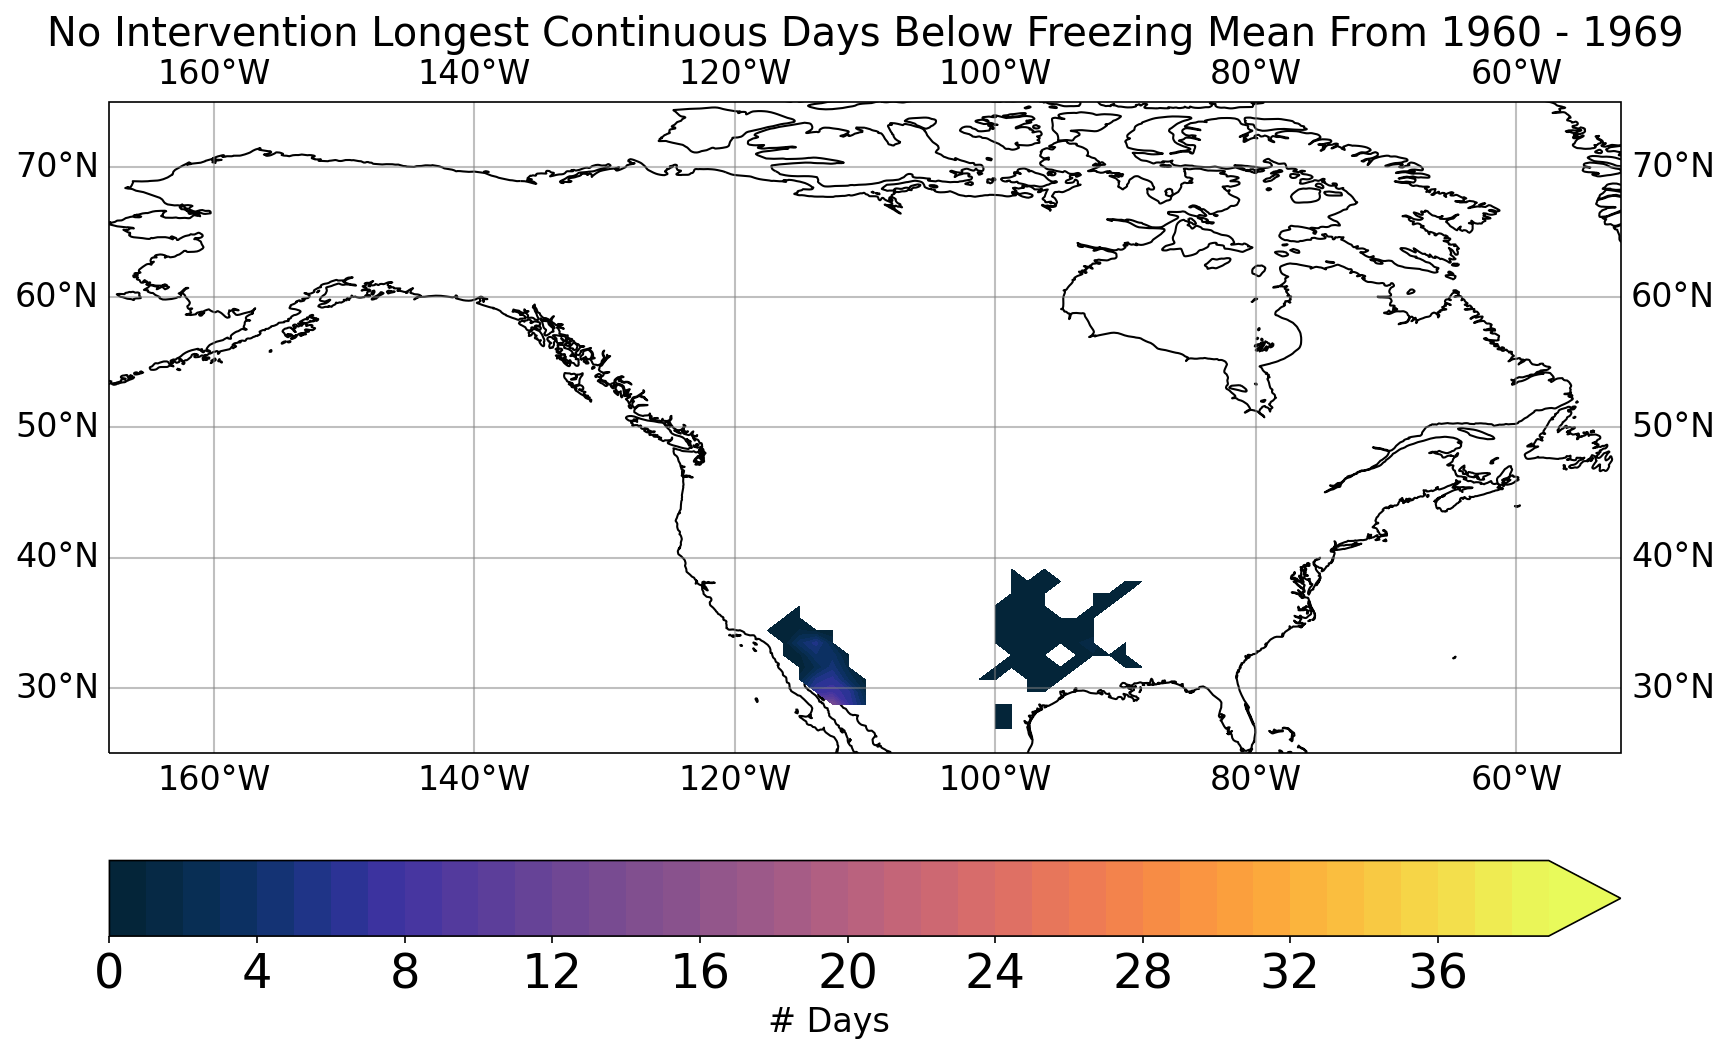

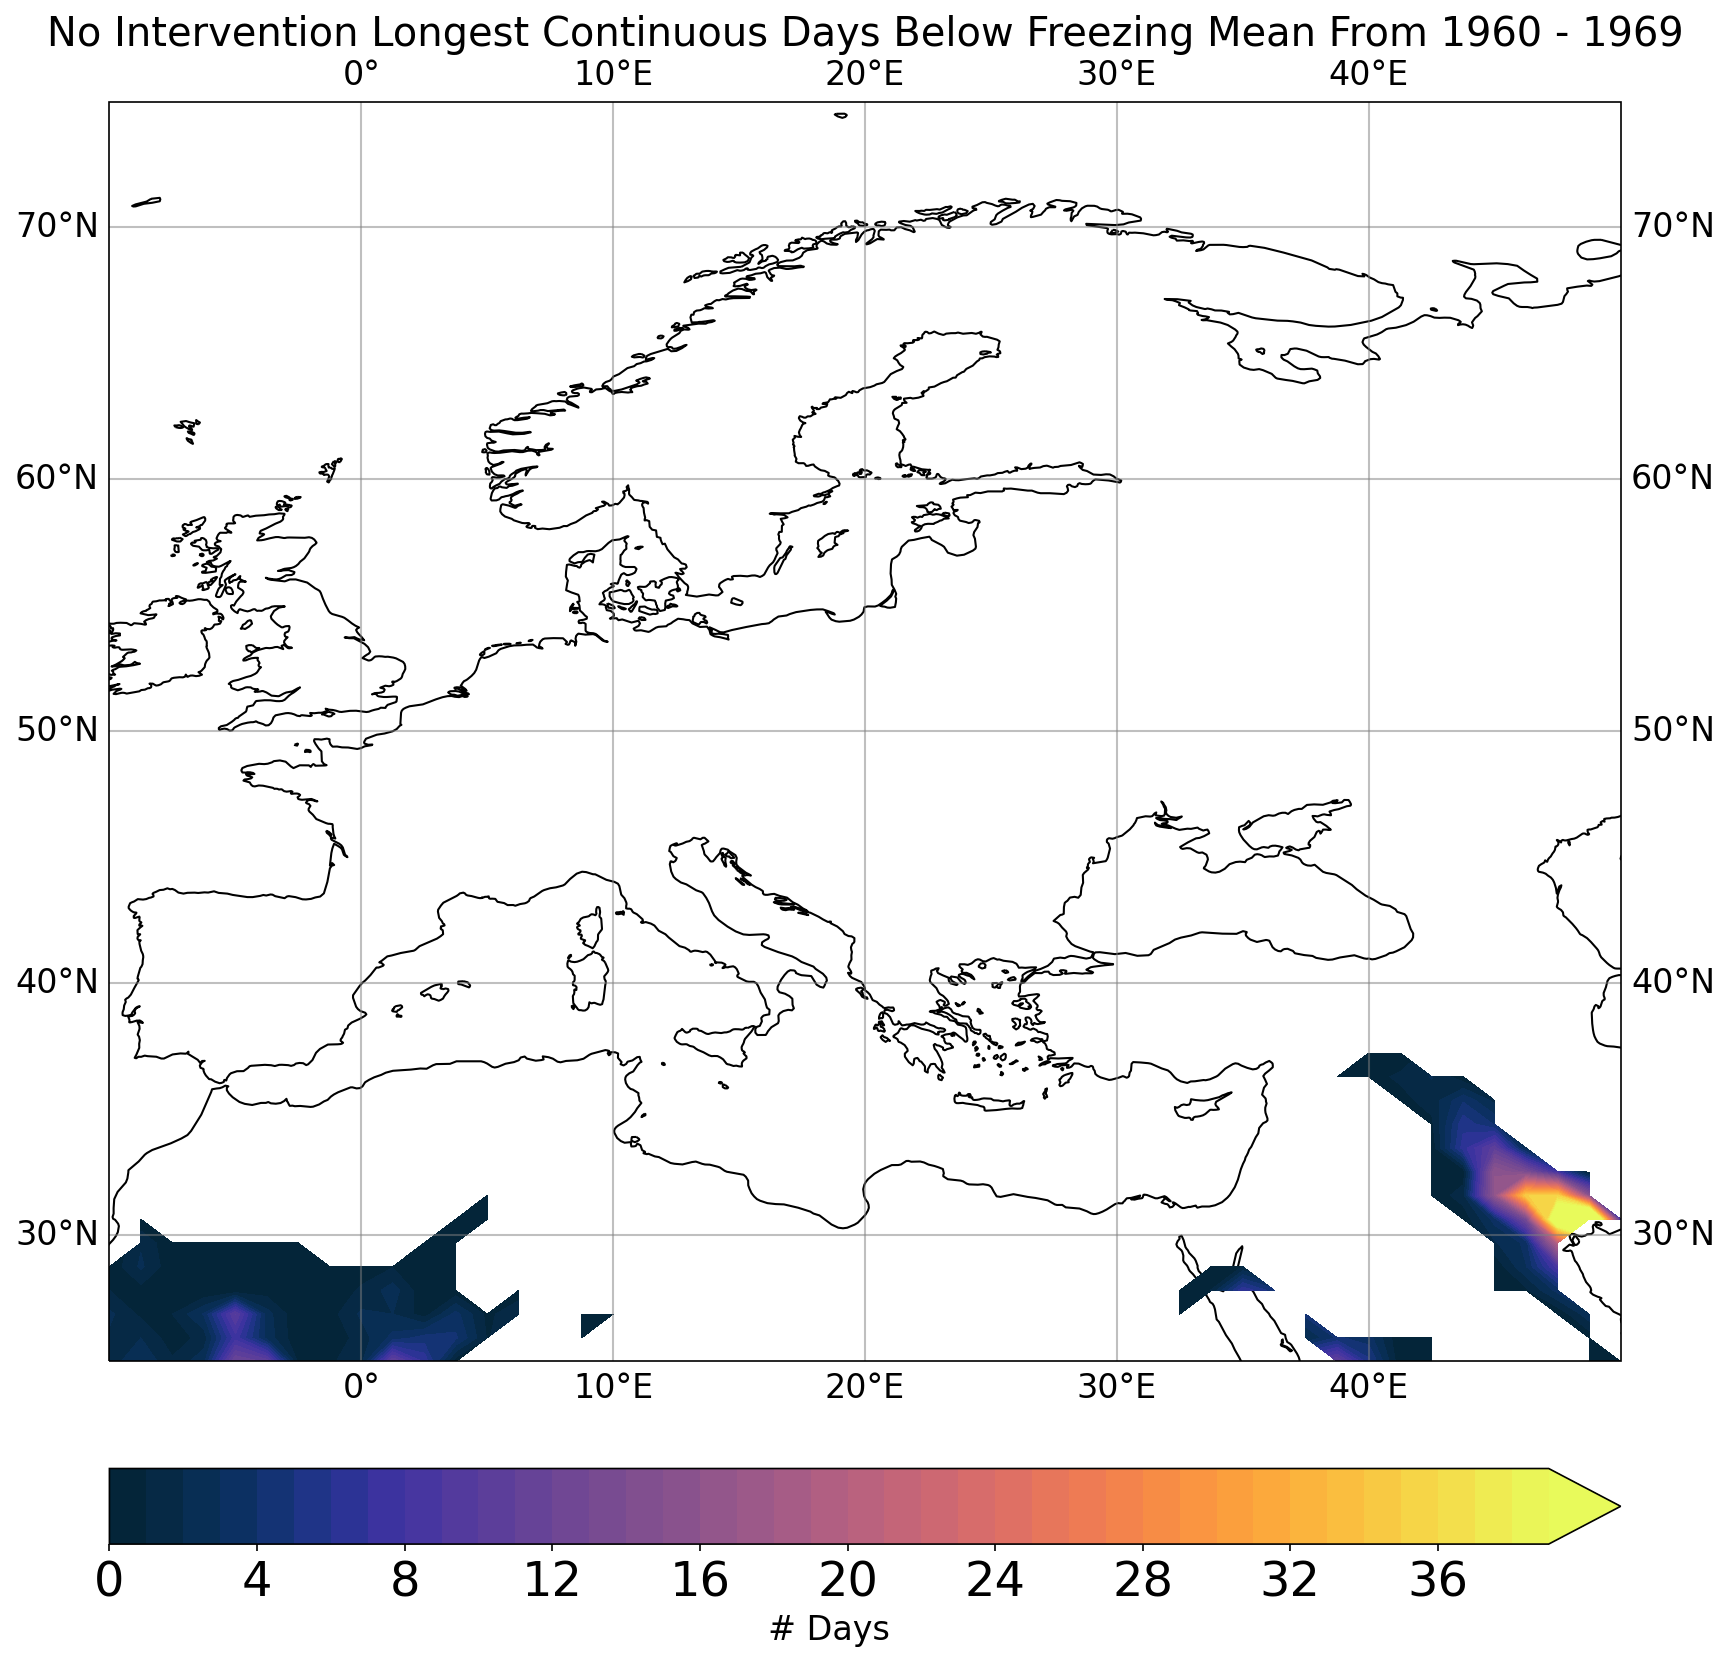

In [15]:
y = dataFile['lat']
plot, x  = add_cyclic_point(cesm_1960s_longest_days_mean, coord=dataFile['lon'])
title = 'No Intervention Longest Continuous Days Below Freezing Mean From 1960 - 1969'

plot_global(x,y,plot,levels,title,'max',longest_cm)
plot_north_america(x,y,plot,NA_levs,title,'max',longest_cm)
plot_europe(x,y,plot,EU_levs,title,'max',longest_cm)

In [16]:
cont_days_above_40_future = xr.open_dataset('continuous_days_above_40.nc')

In [17]:
cont_days_above_40_future

<xarray.Dataset>
Dimensions:                                    (data_points: 100, lat: 192,
                                                lon: 288)
Dimensions without coordinates: data_points, lat, lon
Data variables:
    arise_2060s_continuous_days_above_40       (data_points, lat, lon) float32 ...
    cesm_2060s_continuous_days_above_40        (data_points, lat, lon) float32 ...
    arise_2060s_continuous_days_above_40_mean  (lat, lon) float32 ...
    cesm_2060s_continuous_days_above_40_mean   (lat, lon) float32 ...
    LONG                                       (lon) float32 ...
    LAT                                        (lat) float32 ...
    note:                                      float32 ...

In [ ]:
levels = np.arange(0,40,1)
anom_levs=np.arange(-15,16,1)


NA_levs = np.arange(0,40,1)
NA_anom_levs = np.arange(-15,16,1)

EU_levs = np.arange(0,40,1)
EU_anom_levs = np.arange(-15,16,1)

In [19]:
np.max(cont_days_above_40_future['arise_2060s_continuous_days_above_40_mean']-cesm_1960s_longest_days_mean)

<xarray.DataArray 'arise_2060s_continuous_days_above_40_mean' ()>
array(42.79333394)

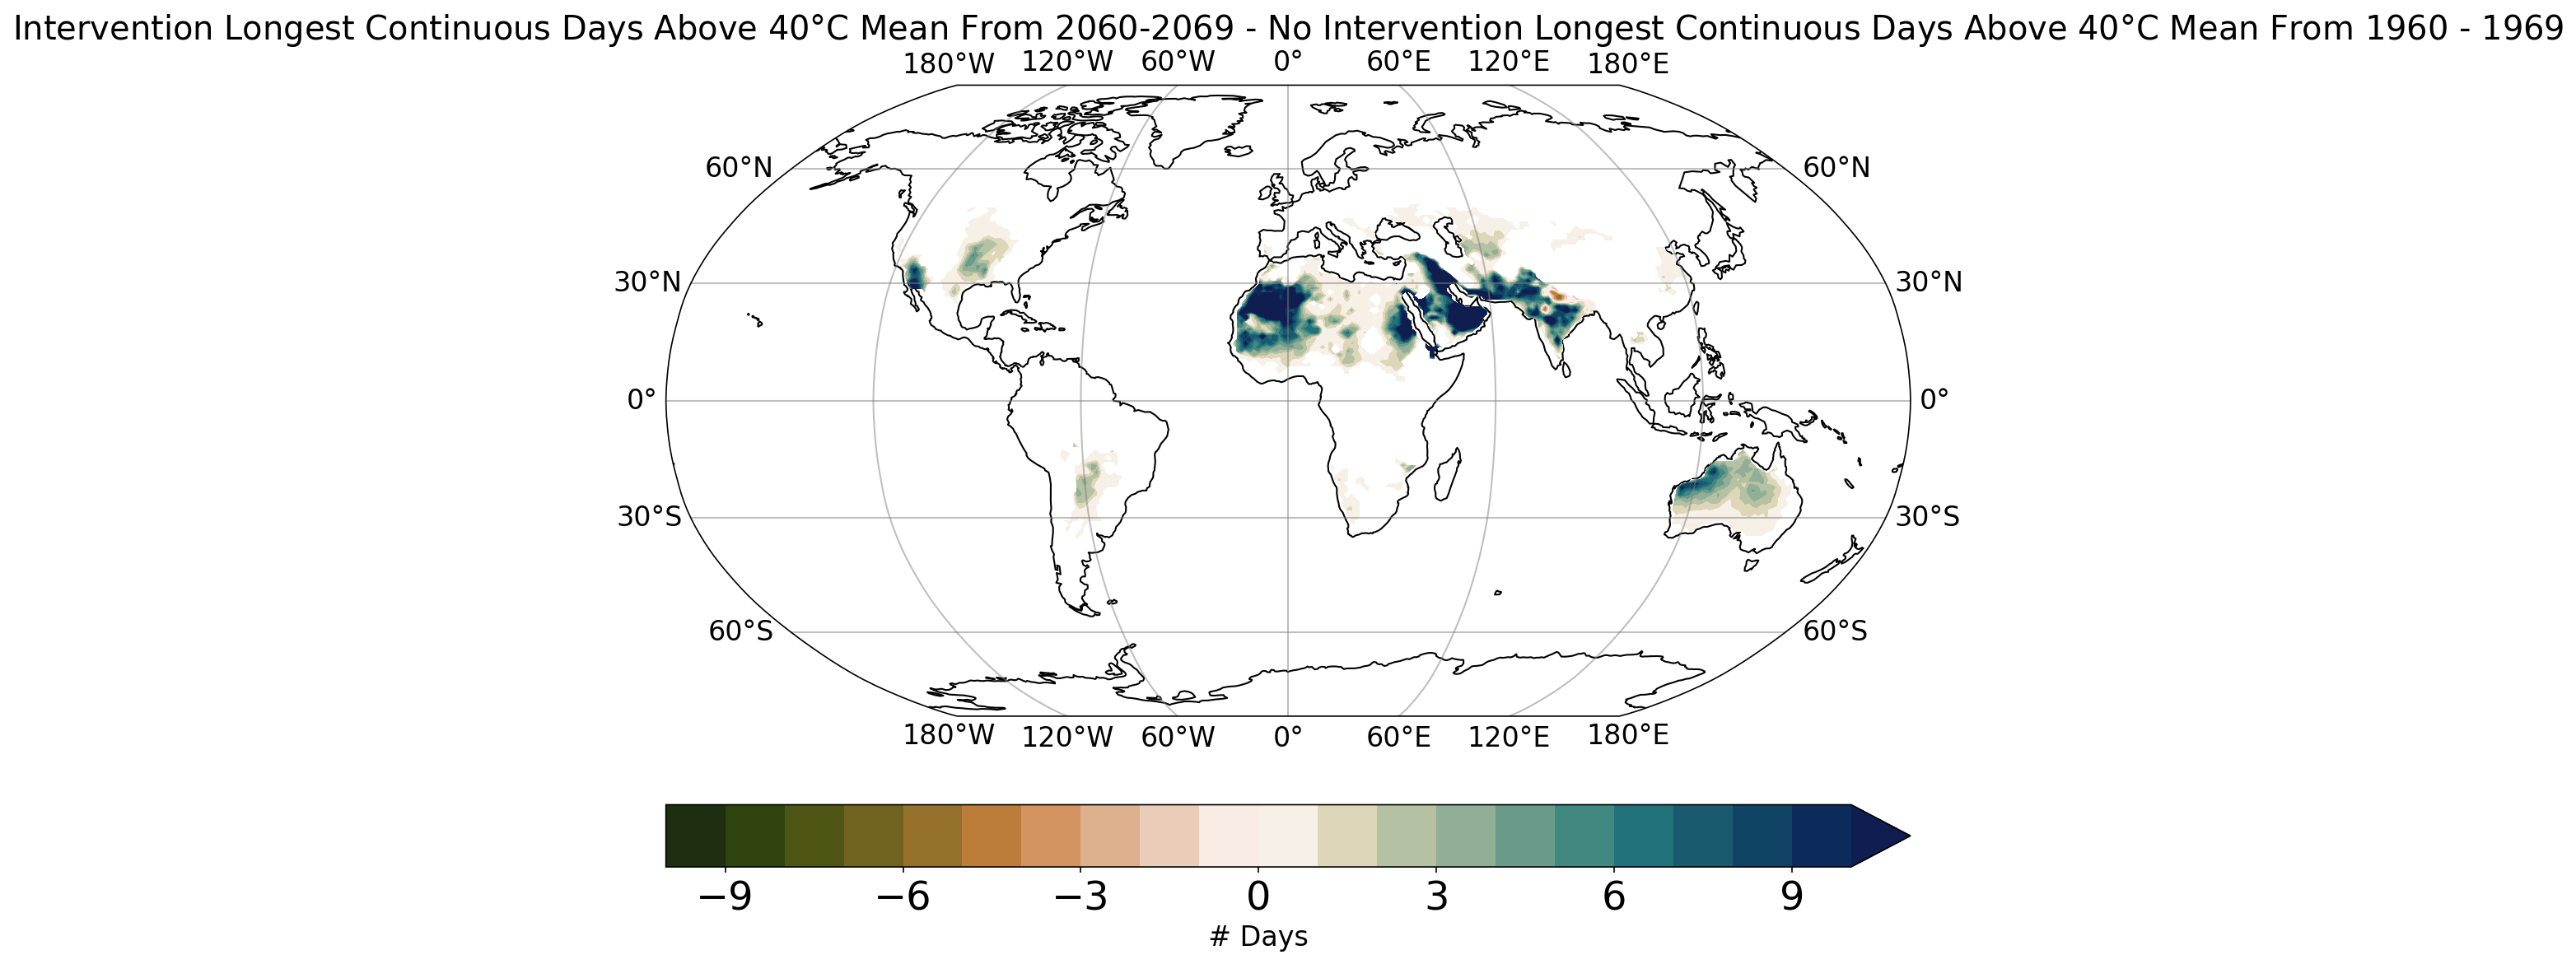

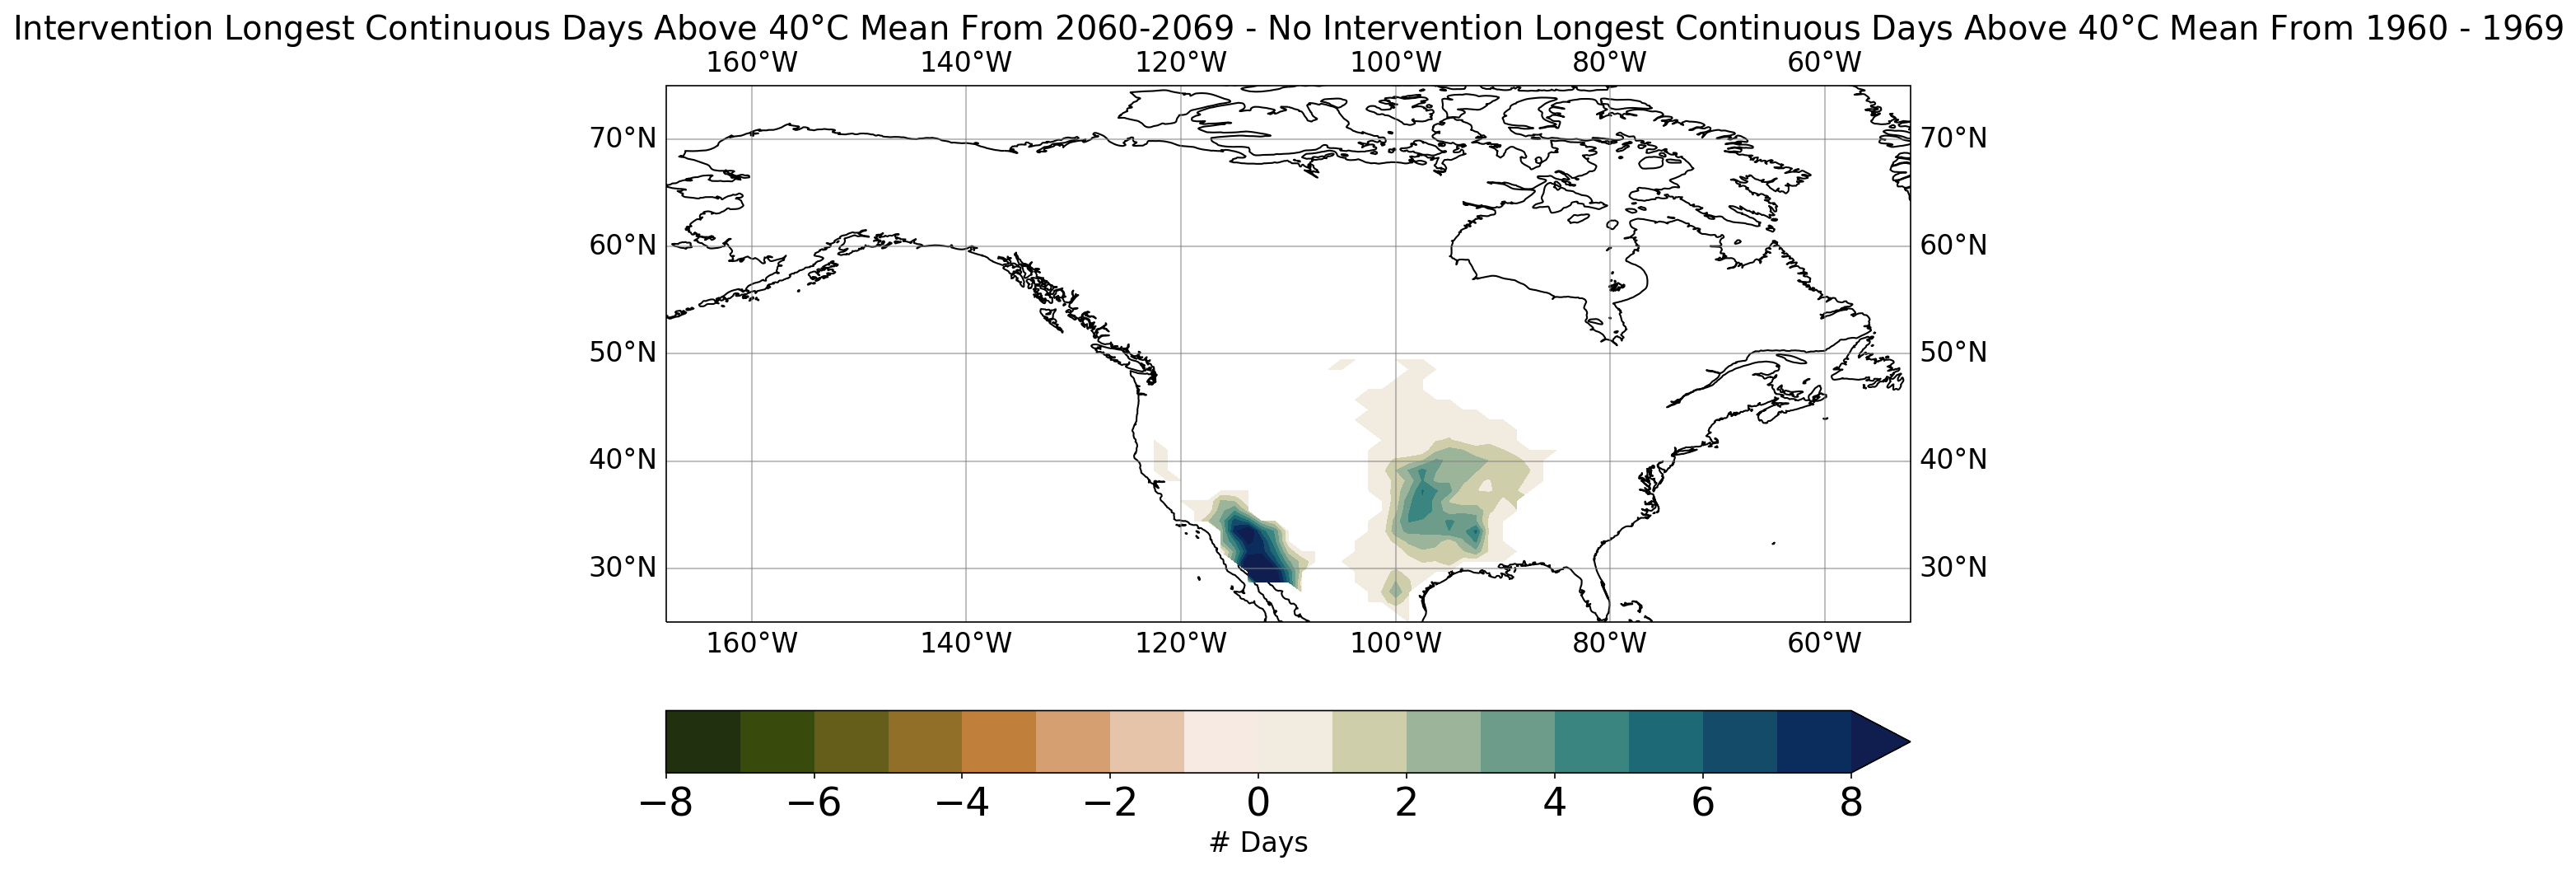

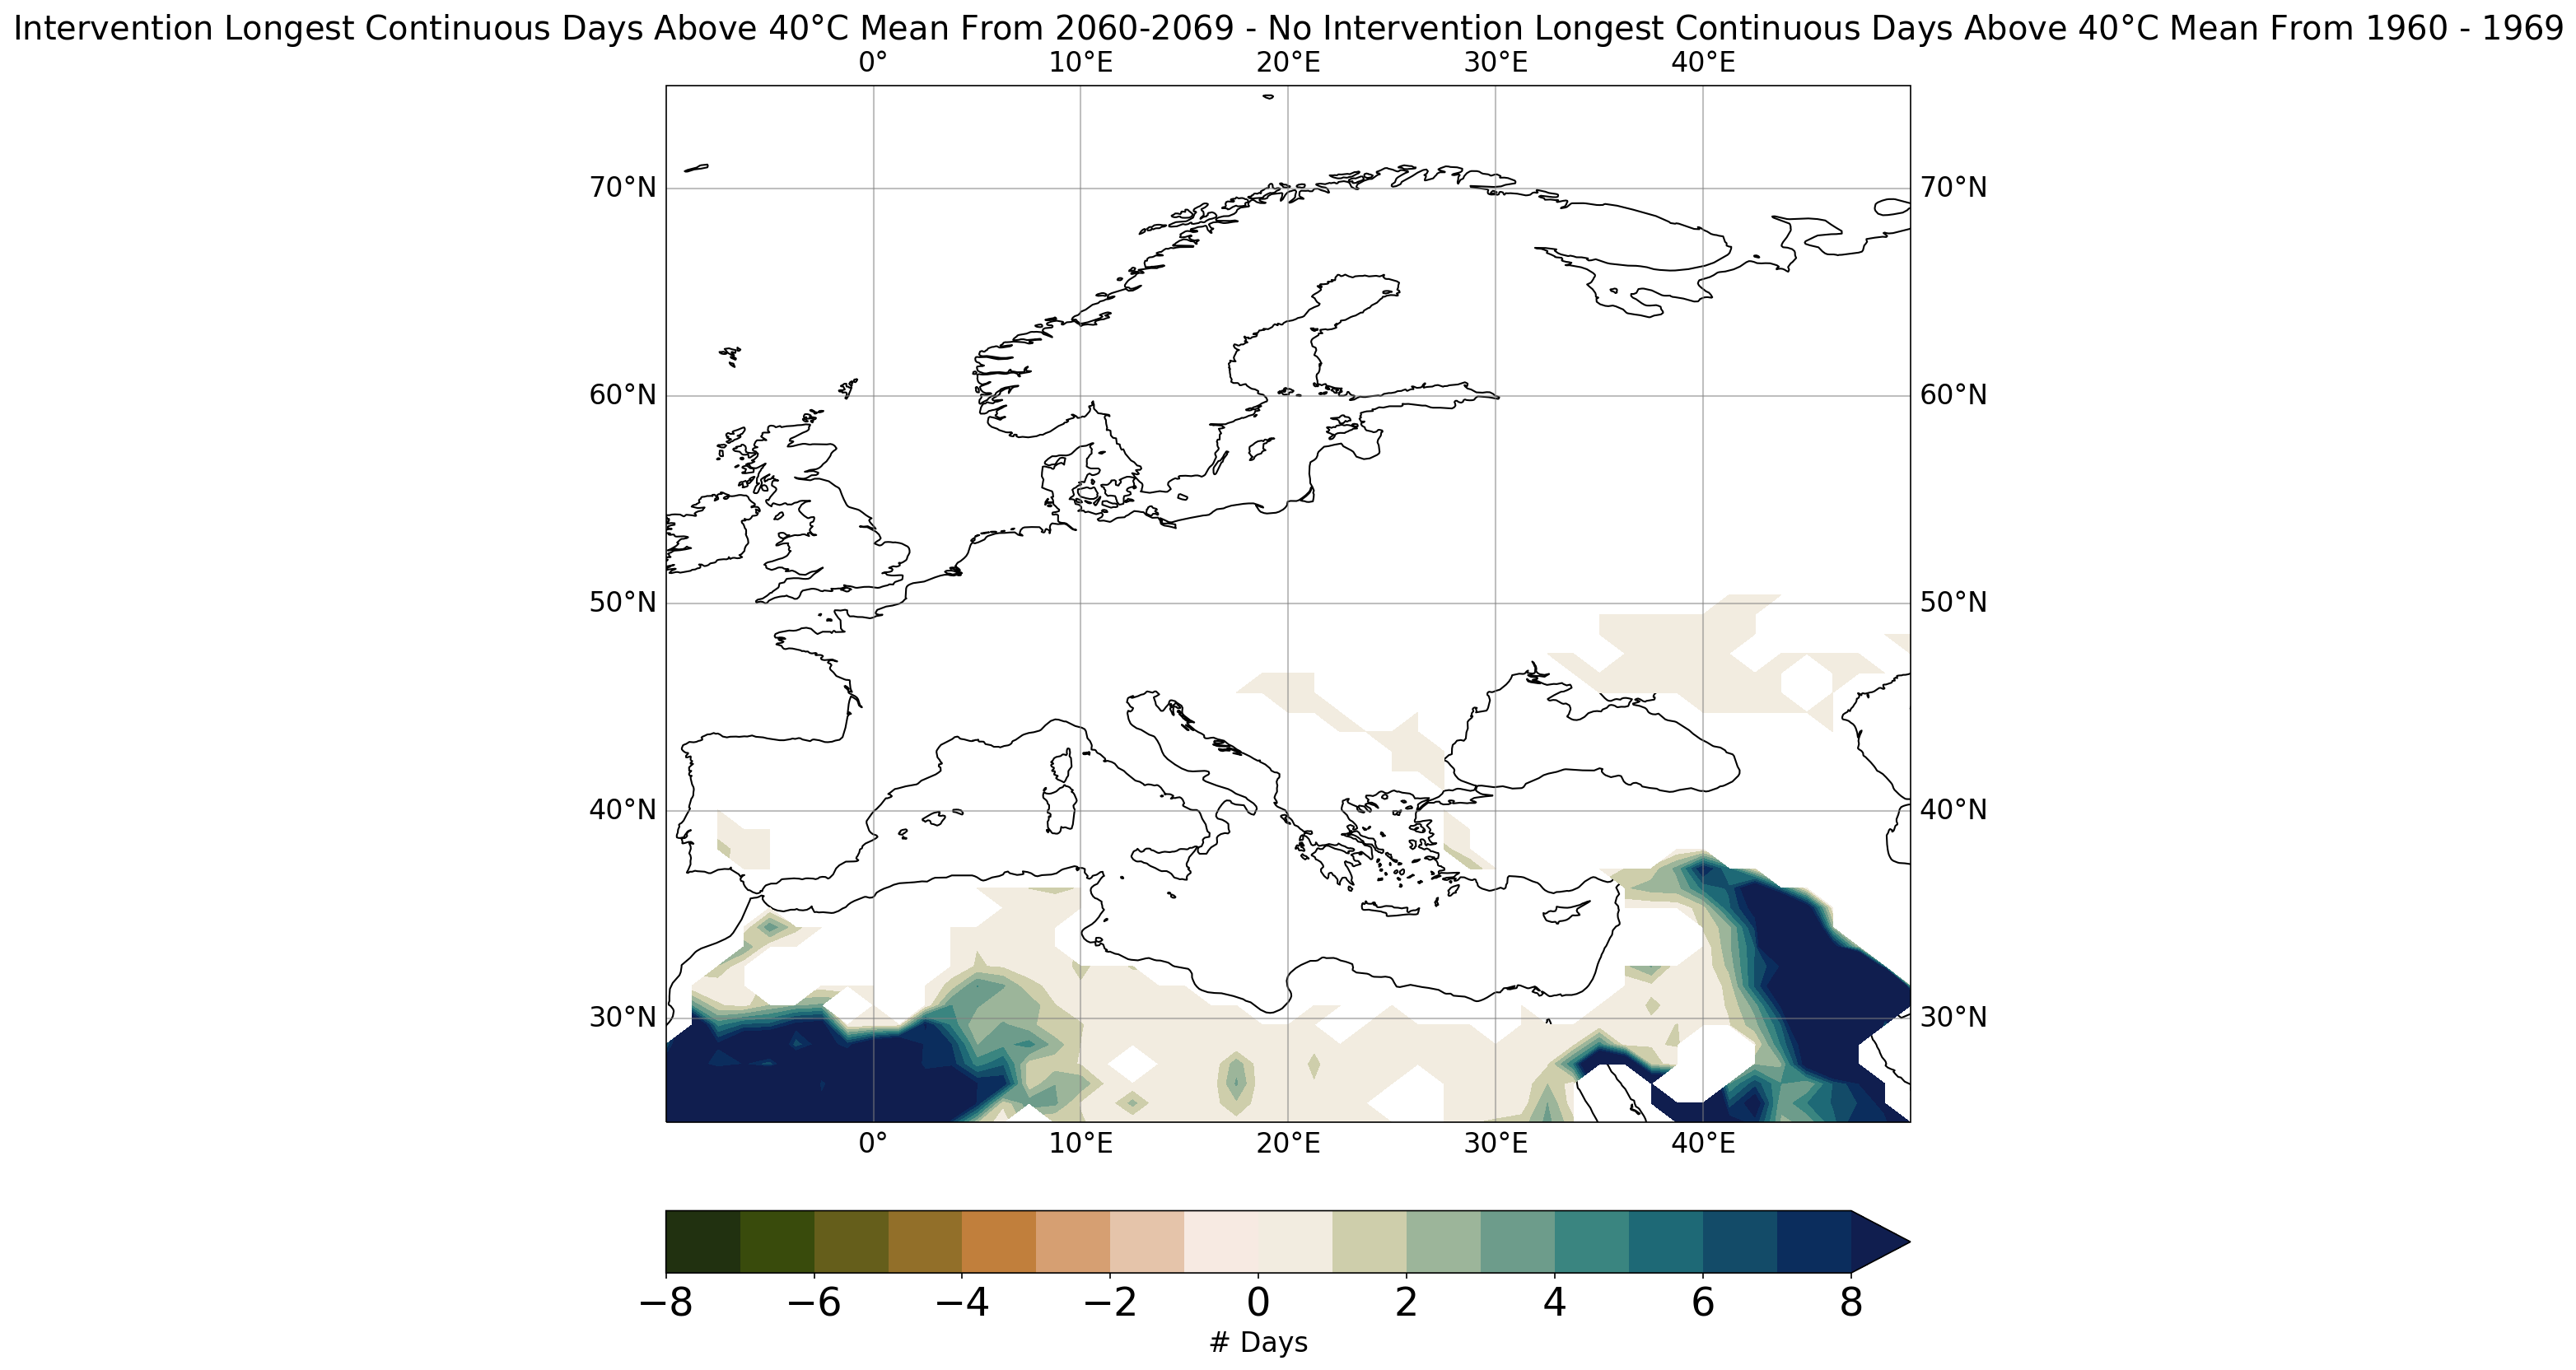

In [21]:
y = dataFile['lat']
plot, x  = add_cyclic_point(cont_days_above_40_future['arise_2060s_continuous_days_above_40_mean']-cesm_1960s_longest_days_mean,
                            coord=dataFile['lon'])
title = 'Intervention Longest Continuous Days Above 40$\degree$C Mean From 2060-2069 - No Intervention Longest Continuous Days Above 40$\degree$C Mean From 1960 - 1969'

plot_global(x,y,plot,anom_levs,title,'max',anomaly_cm)
plot_north_america(x,y,plot,NA_anom_levs,title,'max',anomaly_cm)
plot_europe(x,y,plot,EU_anom_levs,title,'max',anomaly_cm)

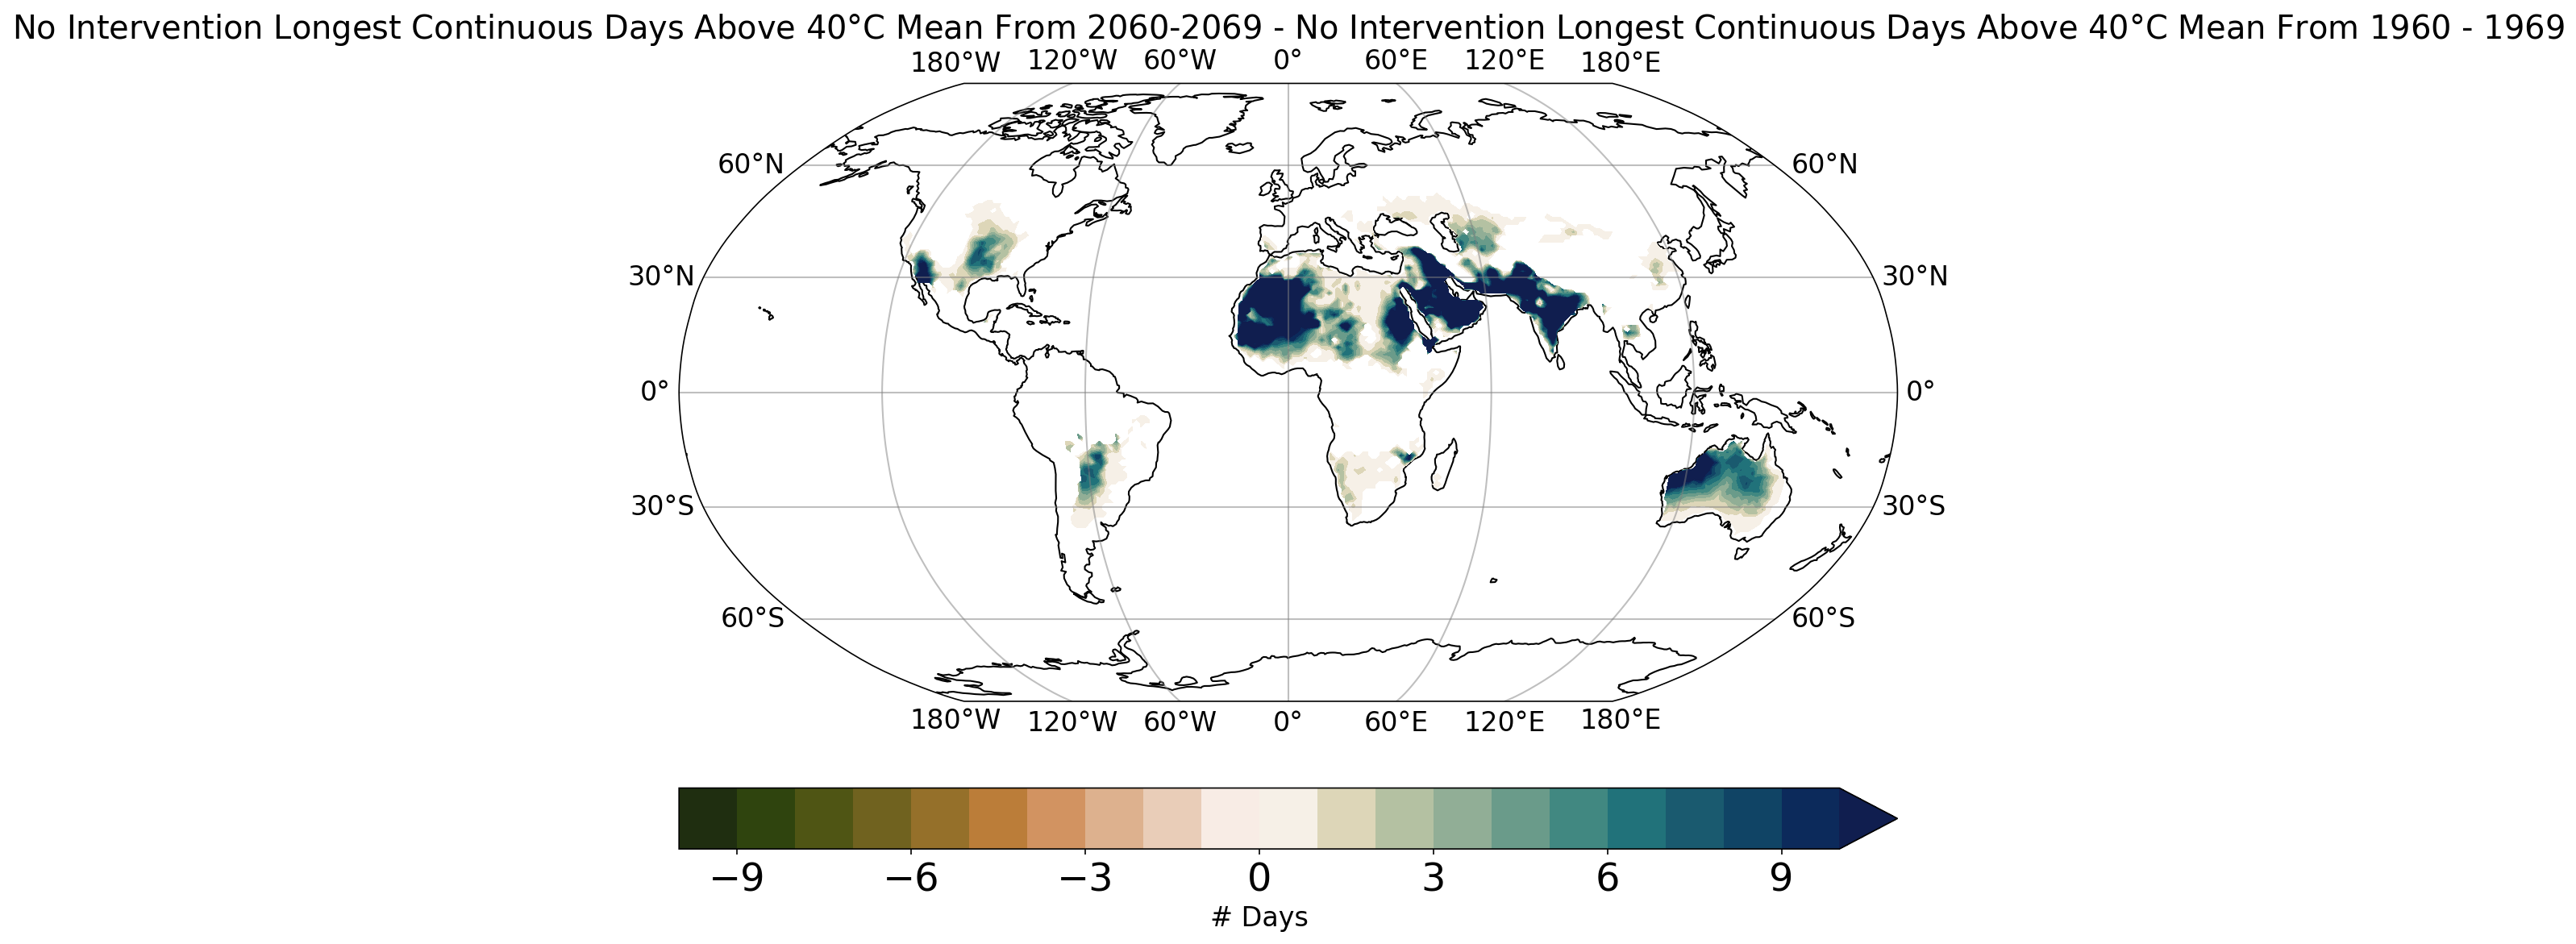

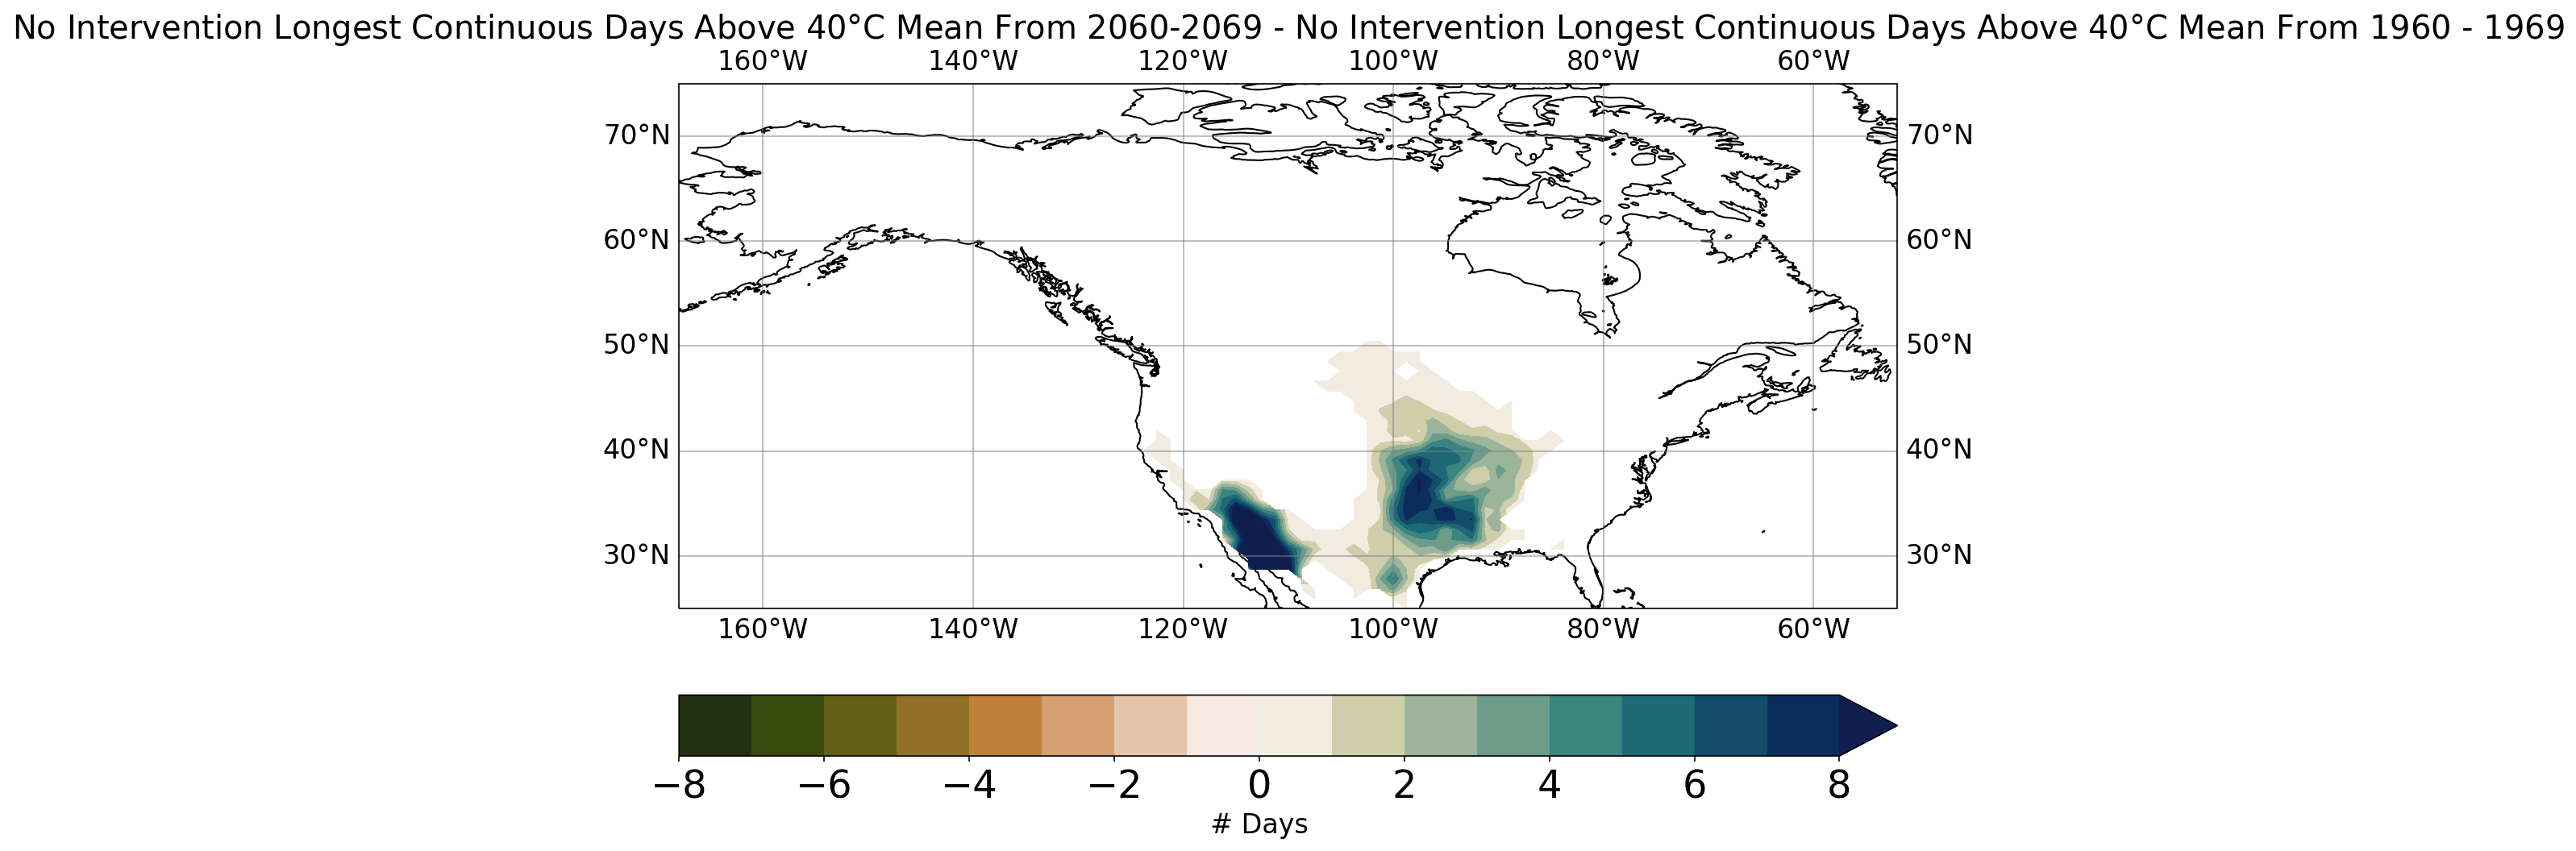

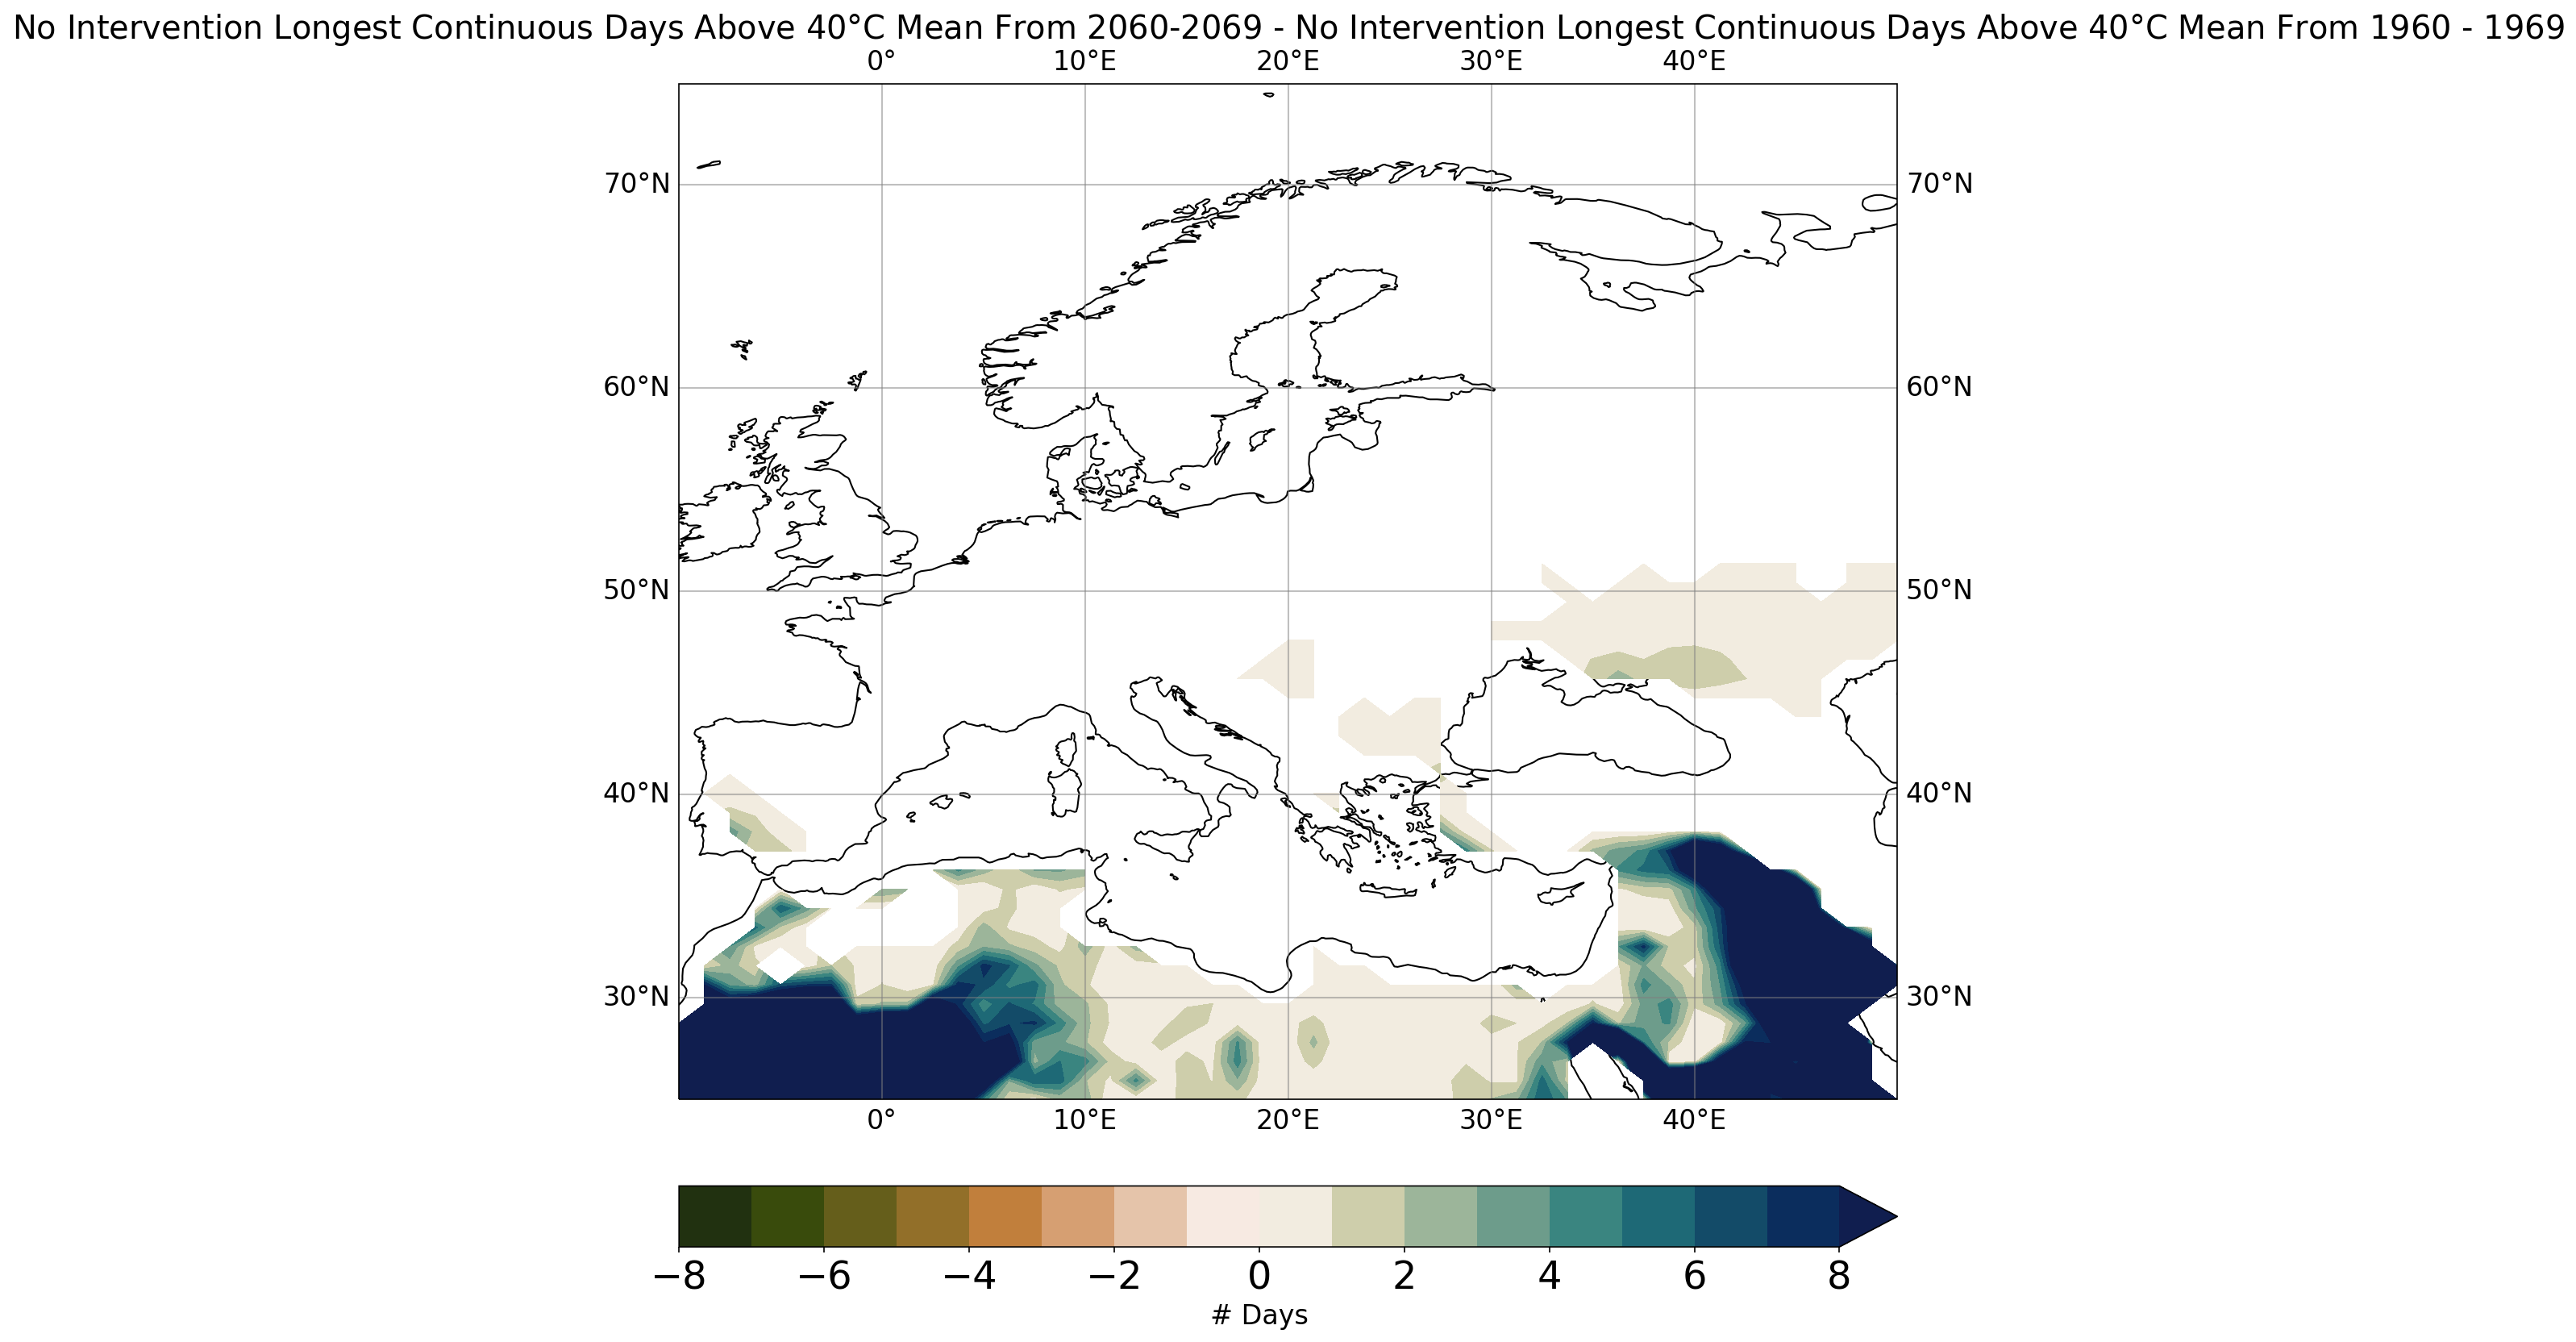

In [22]:
y = dataFile['lat']
plot, x  = add_cyclic_point(cont_days_above_40_future['cesm_2060s_continuous_days_above_40_mean']-cesm_1960s_longest_days_mean,
                            coord=dataFile['lon'])
title = 'No Intervention Longest Continuous Days Above 40$\degree$C Mean From 2060-2069 - No Intervention Longest Continuous Days Above 40$\degree$C Mean From 1960 - 1969'

plot_global(x,y,plot,anom_levs,title,'max',anomaly_cm)
plot_north_america(x,y,plot,NA_anom_levs,title,'max',anomaly_cm)
plot_europe(x,y,plot,EU_anom_levs,title,'max',anomaly_cm)

# July - June

In [23]:
path = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'/atm/proc/tseries/day_1/'
dataFile = xr.open_mfdataset(path+'b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'.cam.h1.TS.*19*' + '.nc')

In [24]:
dataFile['TS']

<xarray.DataArray 'TS' (time: 36500, lat: 192, lon: 288)>
dask.array<concatenate, shape=(36500, 192, 288), dtype=float32, chunksize=(3650, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1900-01-01 00:00:00 ... 1999-12-31 00:00:00
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean

In [25]:
dataFile['time'][(60*365)-184:(70*365)-184]

<xarray.DataArray 'time' (time: 3650)>
array([cftime.DatetimeNoLeap(1959, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1959, 7, 2, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1959, 7, 3, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(1969, 6, 28, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 6, 29, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1969, 6, 30, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1959-07-01 00:00:00 ... 1969-06-30 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [26]:
cesm={}
cesm['001','002','003']  ={}

sim_array = ['001','002','003'] 


cesm_1960s_longest_days = []
#cesm_2015_longest_days = []

## Cut is so its only 2035 - 2069
for sim in sim_array: 
    print(sim)

    path = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'/atm/proc/tseries/day_1/'
    dataFile = xr.open_mfdataset(path+'b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.'+sim+'.cam.h1.TS.*19*' + '.nc')
    
    cesm[sim] = np.array(dataFile['TS'][(60*365)-184:(70*365)-184,:,:]-land_data) #get 2035-2069)
    cesm_time = dataFile['time'][(60*365)-184:(70*365)-184]
    print('     Calculate Days Below Freezing')
    print(np.shape(cesm_time))
    #Calculate the longest days
    for year in range(0,10):
        year_increment = 0 + year
        
        if year % 5 == 0:
          #  time = dataFile['time'][7116:20137]

            
            print("CESM: ")
            print(cesm_time[(year_increment)*365:year_increment*365+365][0])
            #print(cesm_time[(year_increment-1)*365+181:(year_increment-1)*365+365+181][0])
        #year_increment*365+181:year_increment*365+365+181

        cesm_1960s_longest_days.append(return_longest_continuous_days(cesm[sim],year_increment*365,year_increment*365+365))


001
     Calculate Days Below Freezing
(3650,)
CESM: 
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(1959, 7, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 1959-07-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds
         0
         100
         200
         300
         400
         500
         600
         700
         800
         900
         1000
         1100
         1200
         1300
         1400
         1500
         1600
         1700
         1800
CESM: 
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(1964, 7, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 1964-07-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds
         1900
         2000
         2100
         2200
         2300
         2400
         2500
         2600
         2700
         2800
         2900
         3000
         3100
         3200
         3300
       

In [27]:
#Over all mean of all simulations
cesm_1960s_longest_days_mean = np.mean(np.array(cesm_1960s_longest_days),axis = 0)

In [28]:
print(np.shape(cesm_1960s_longest_days))
print(np.shape(cesm_1960s_longest_days_mean))

(30, 192, 288)
(192, 288)


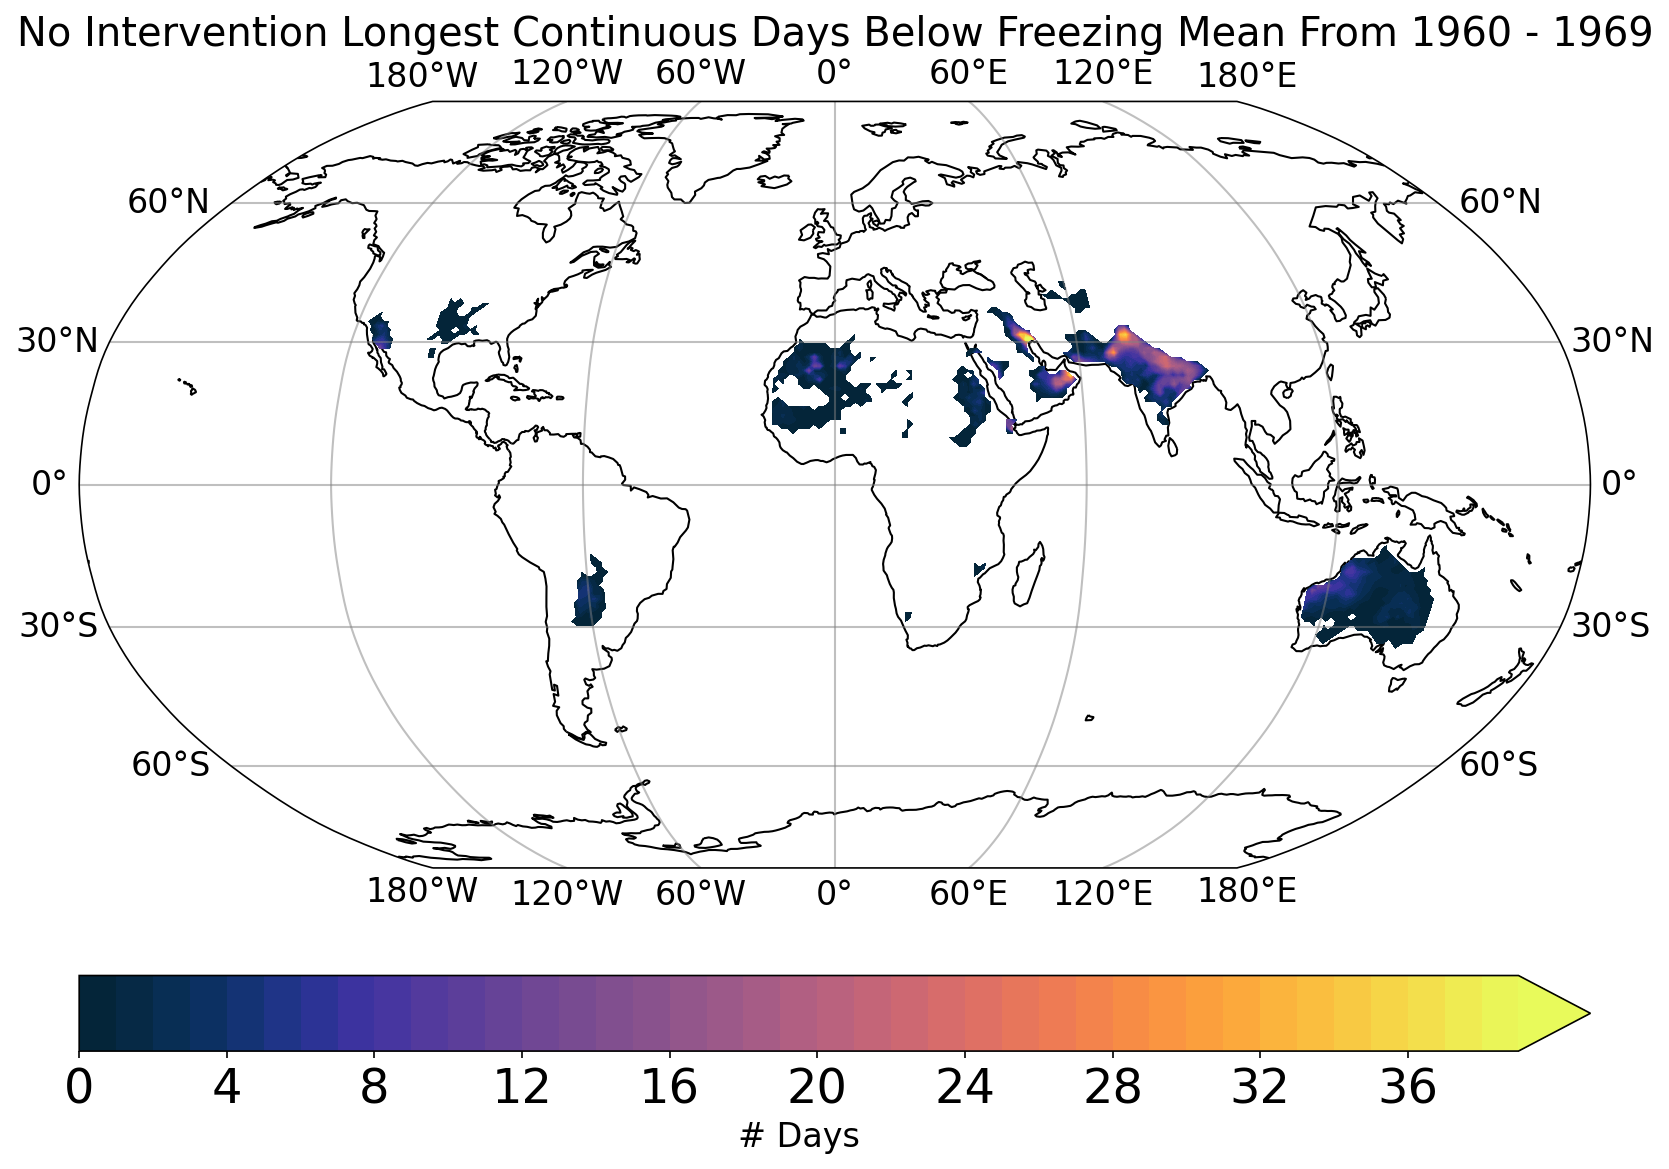

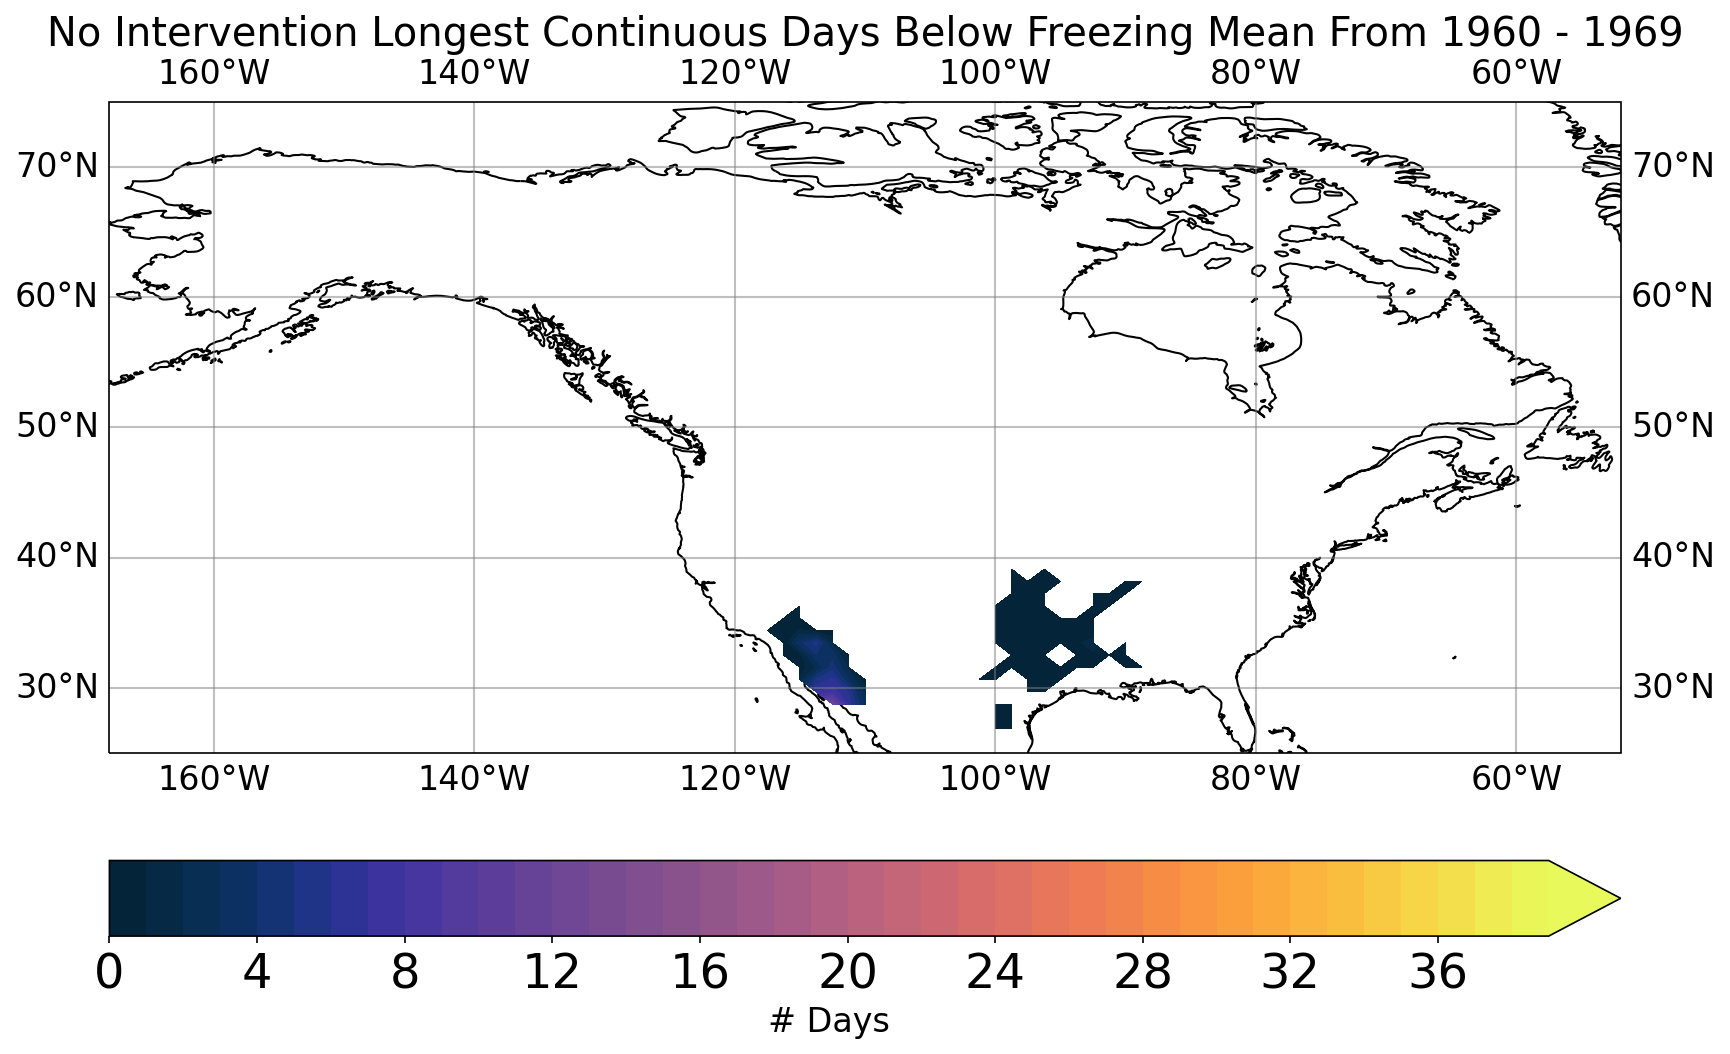

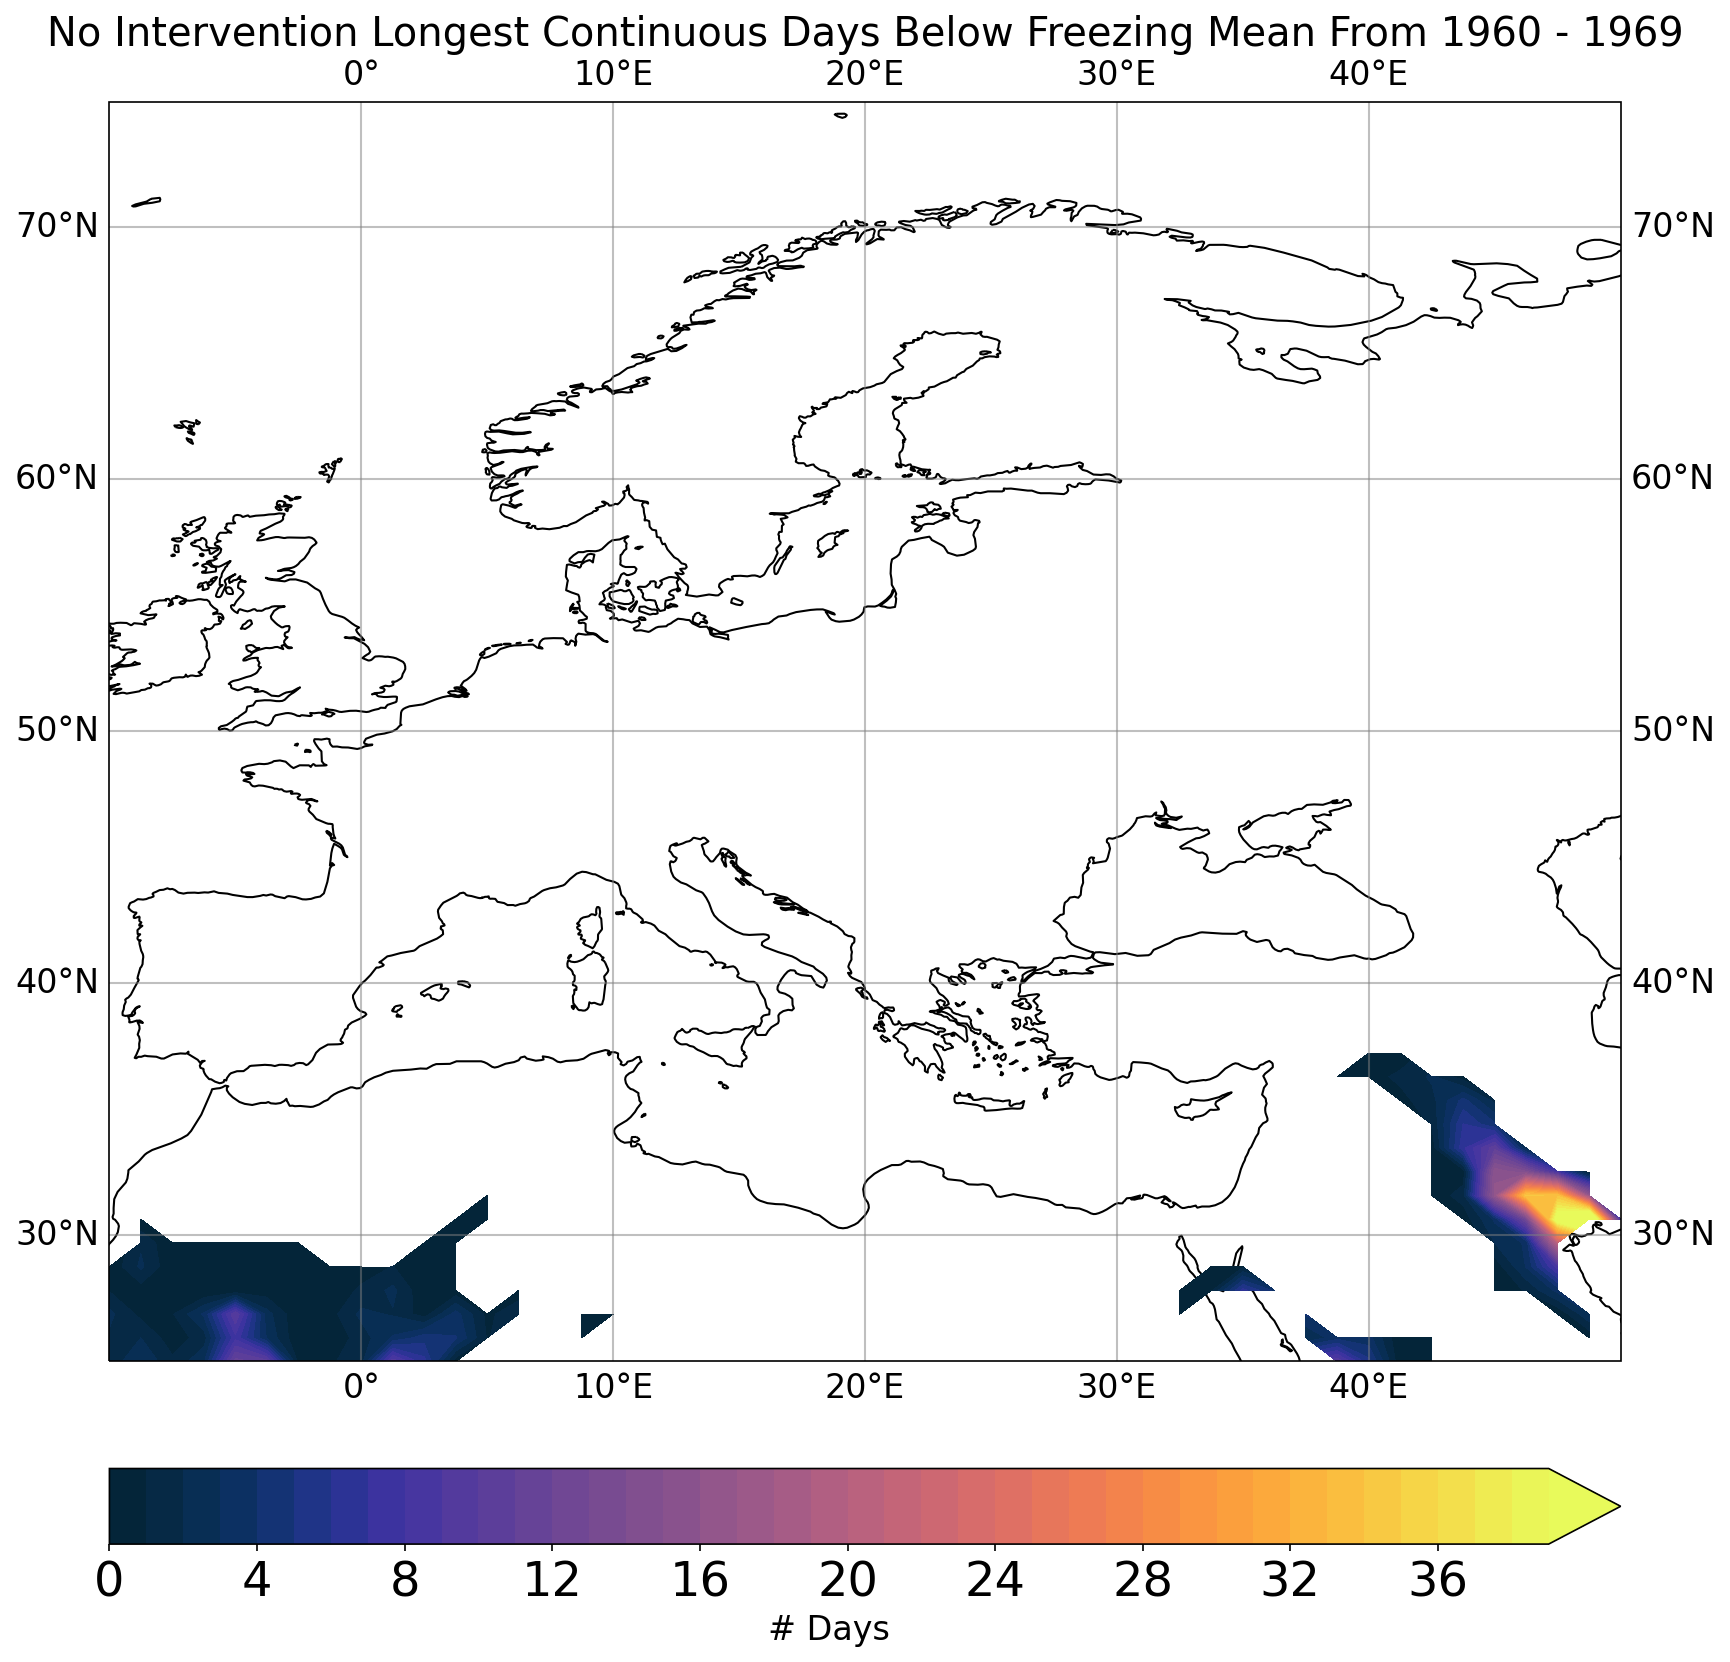

In [29]:
y = dataFile['lat']
plot, x  = add_cyclic_point(cesm_1960s_longest_days_mean, coord=dataFile['lon'])
title = 'No Intervention Longest Continuous Days Below Freezing Mean From 1960 - 1969'

plot_global(x,y,plot,levels,title,'max',longest_cm)
plot_north_america(x,y,plot,NA_levs,title,'max',longest_cm)
plot_europe(x,y,plot,EU_levs,title,'max',longest_cm)

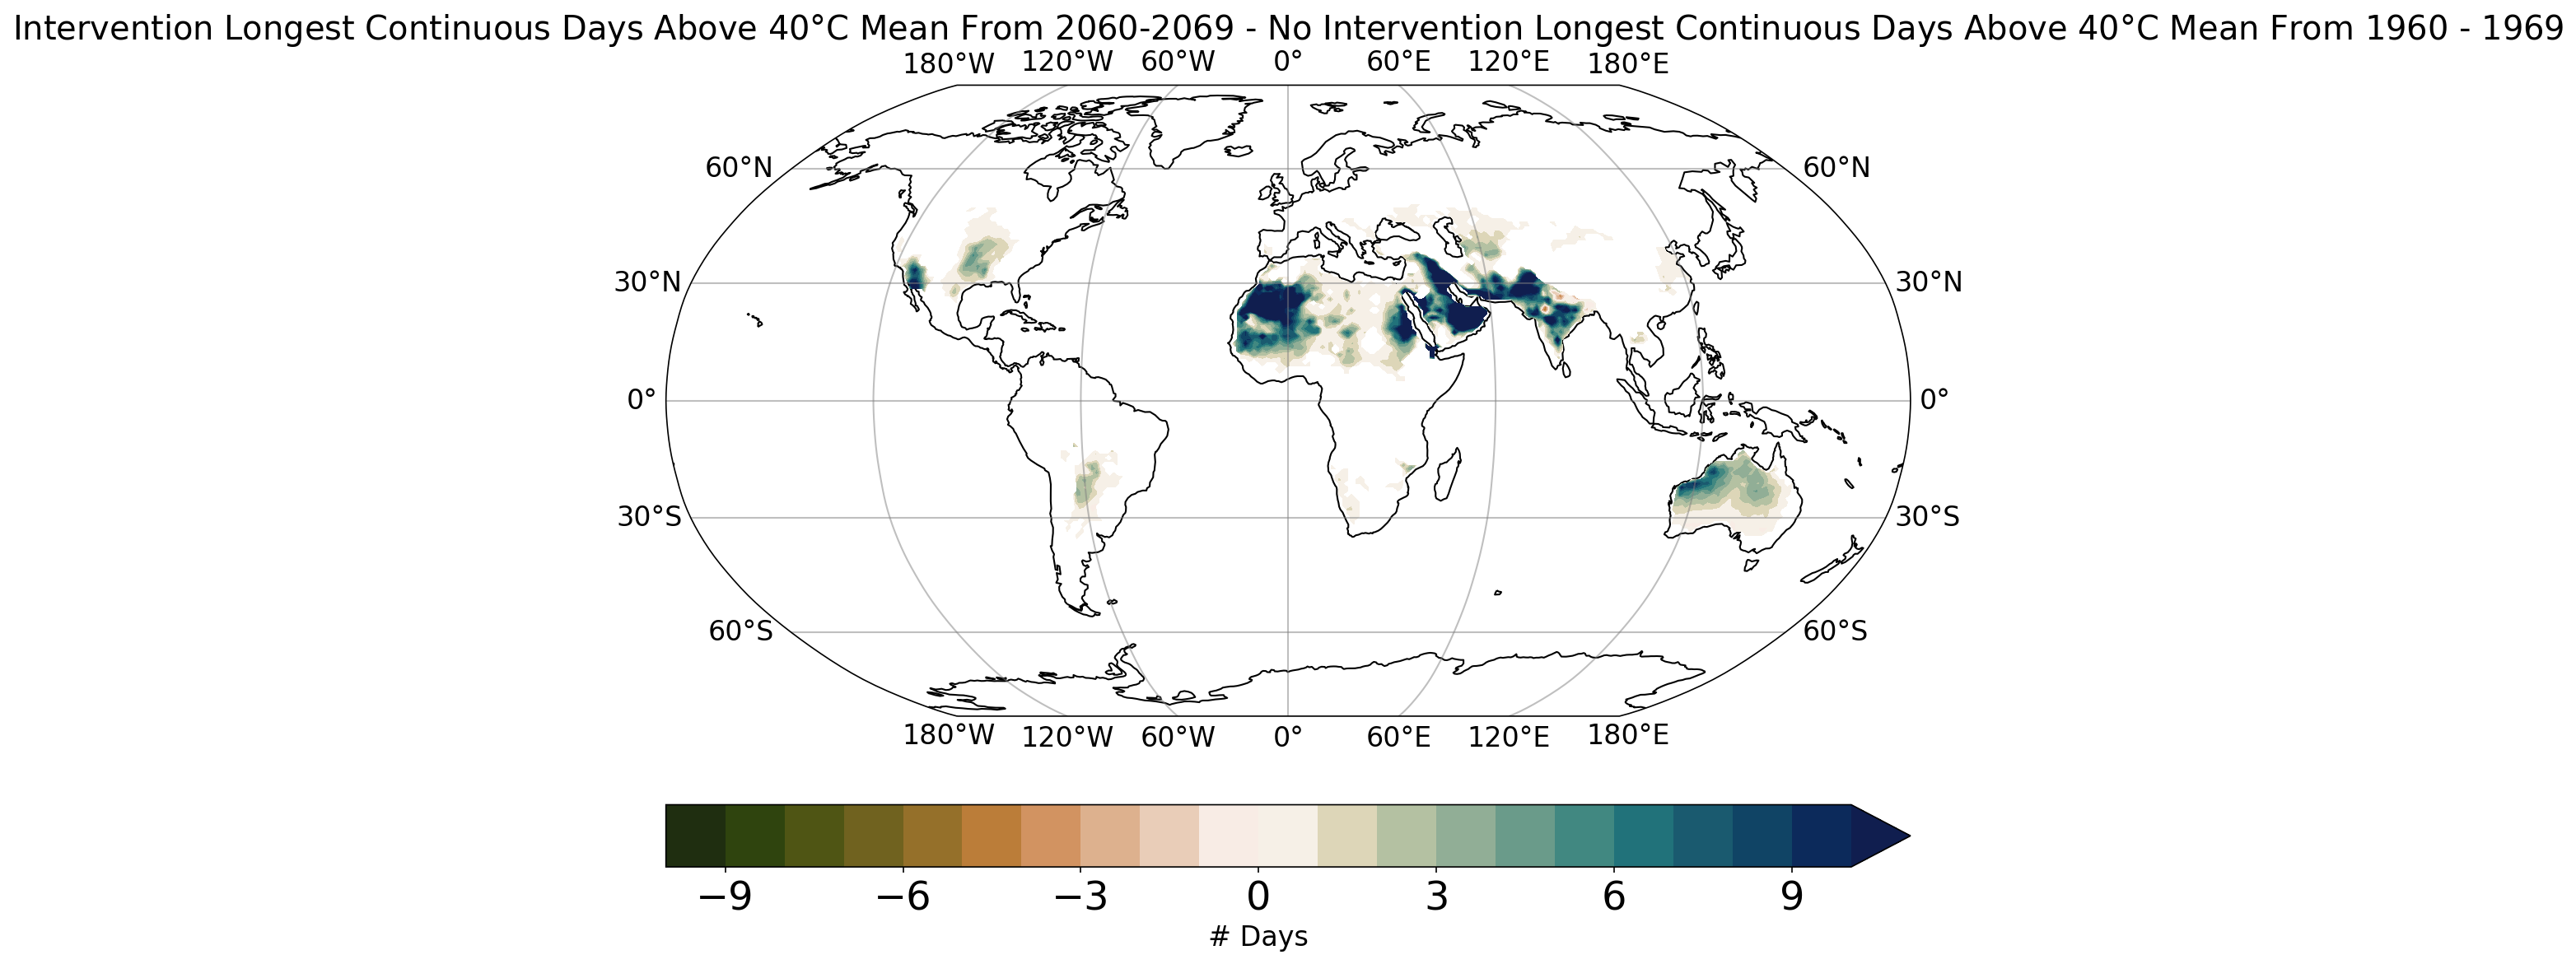

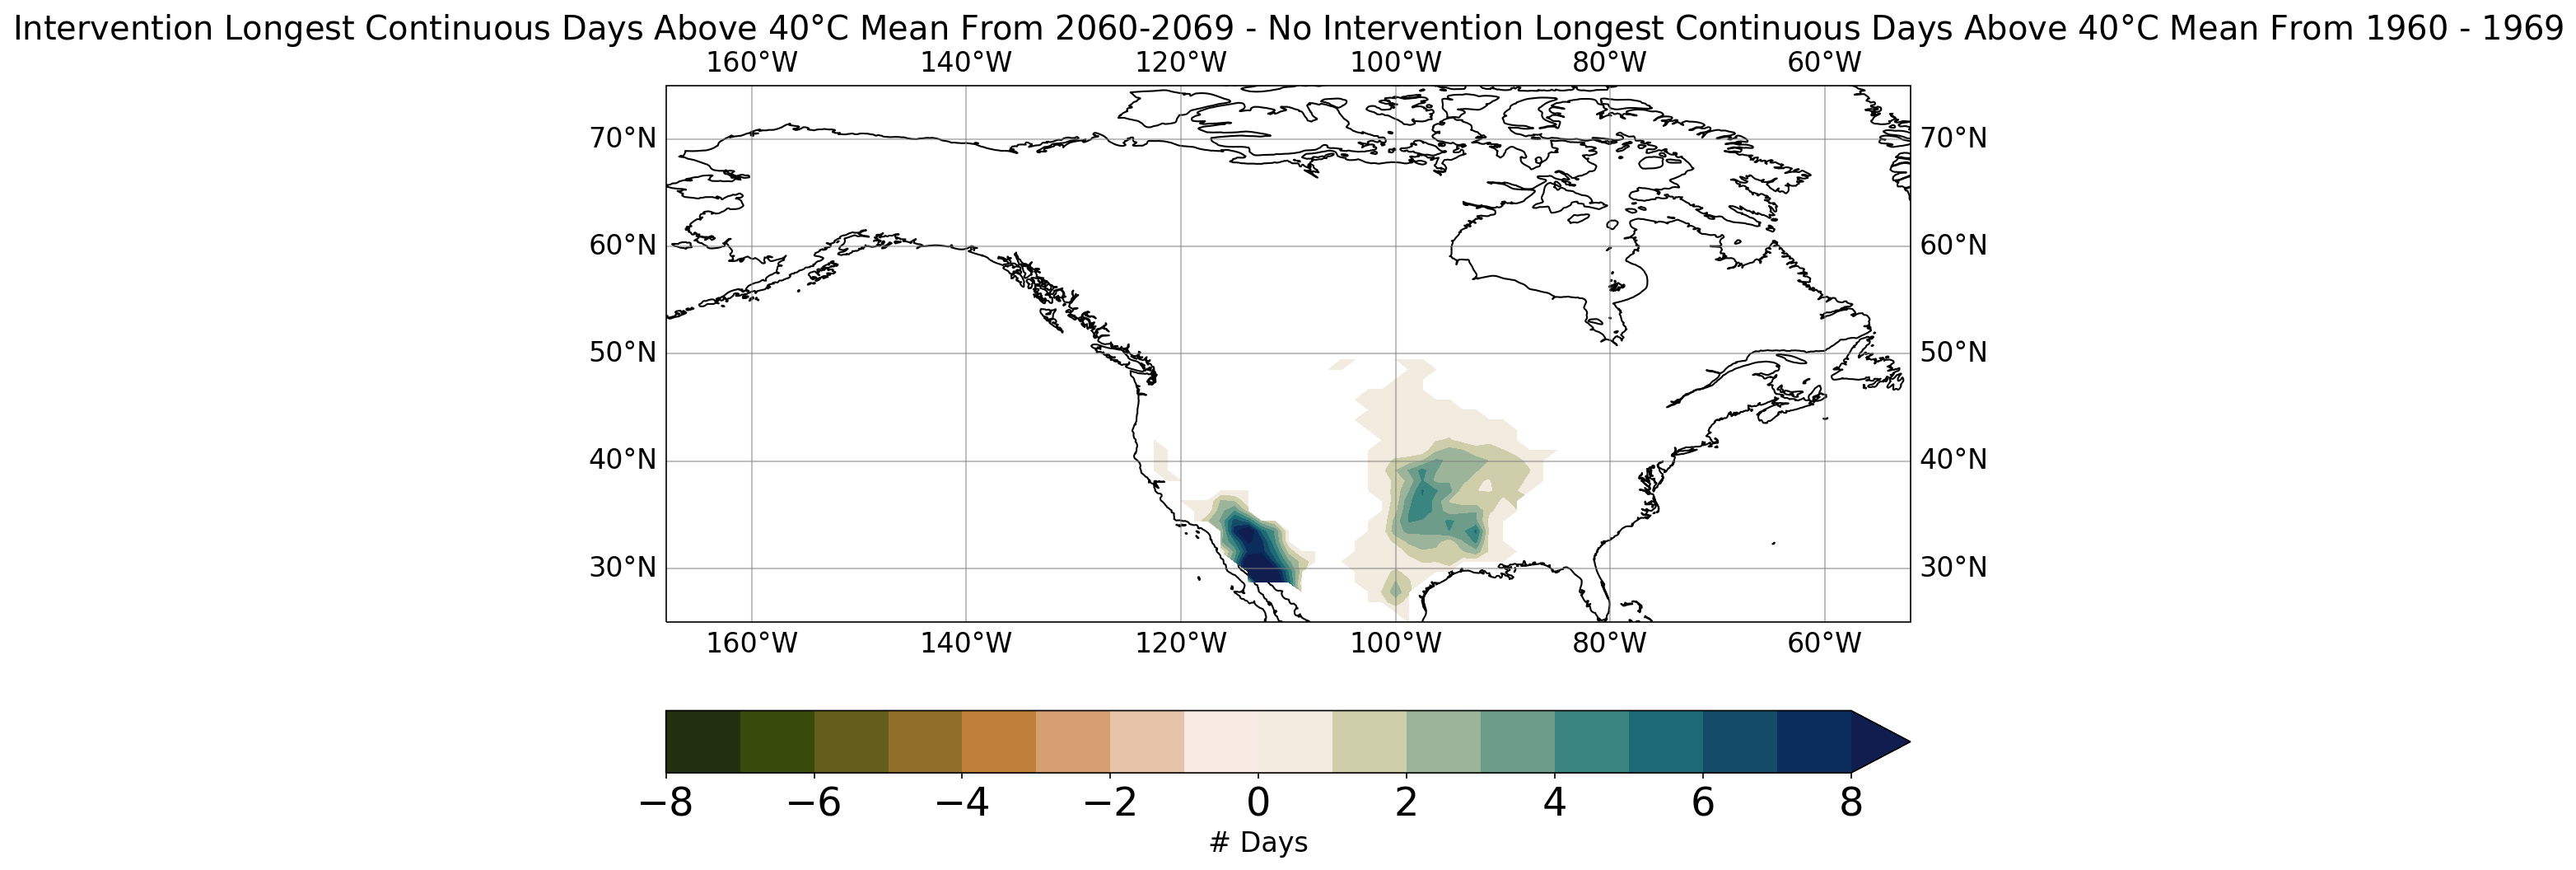

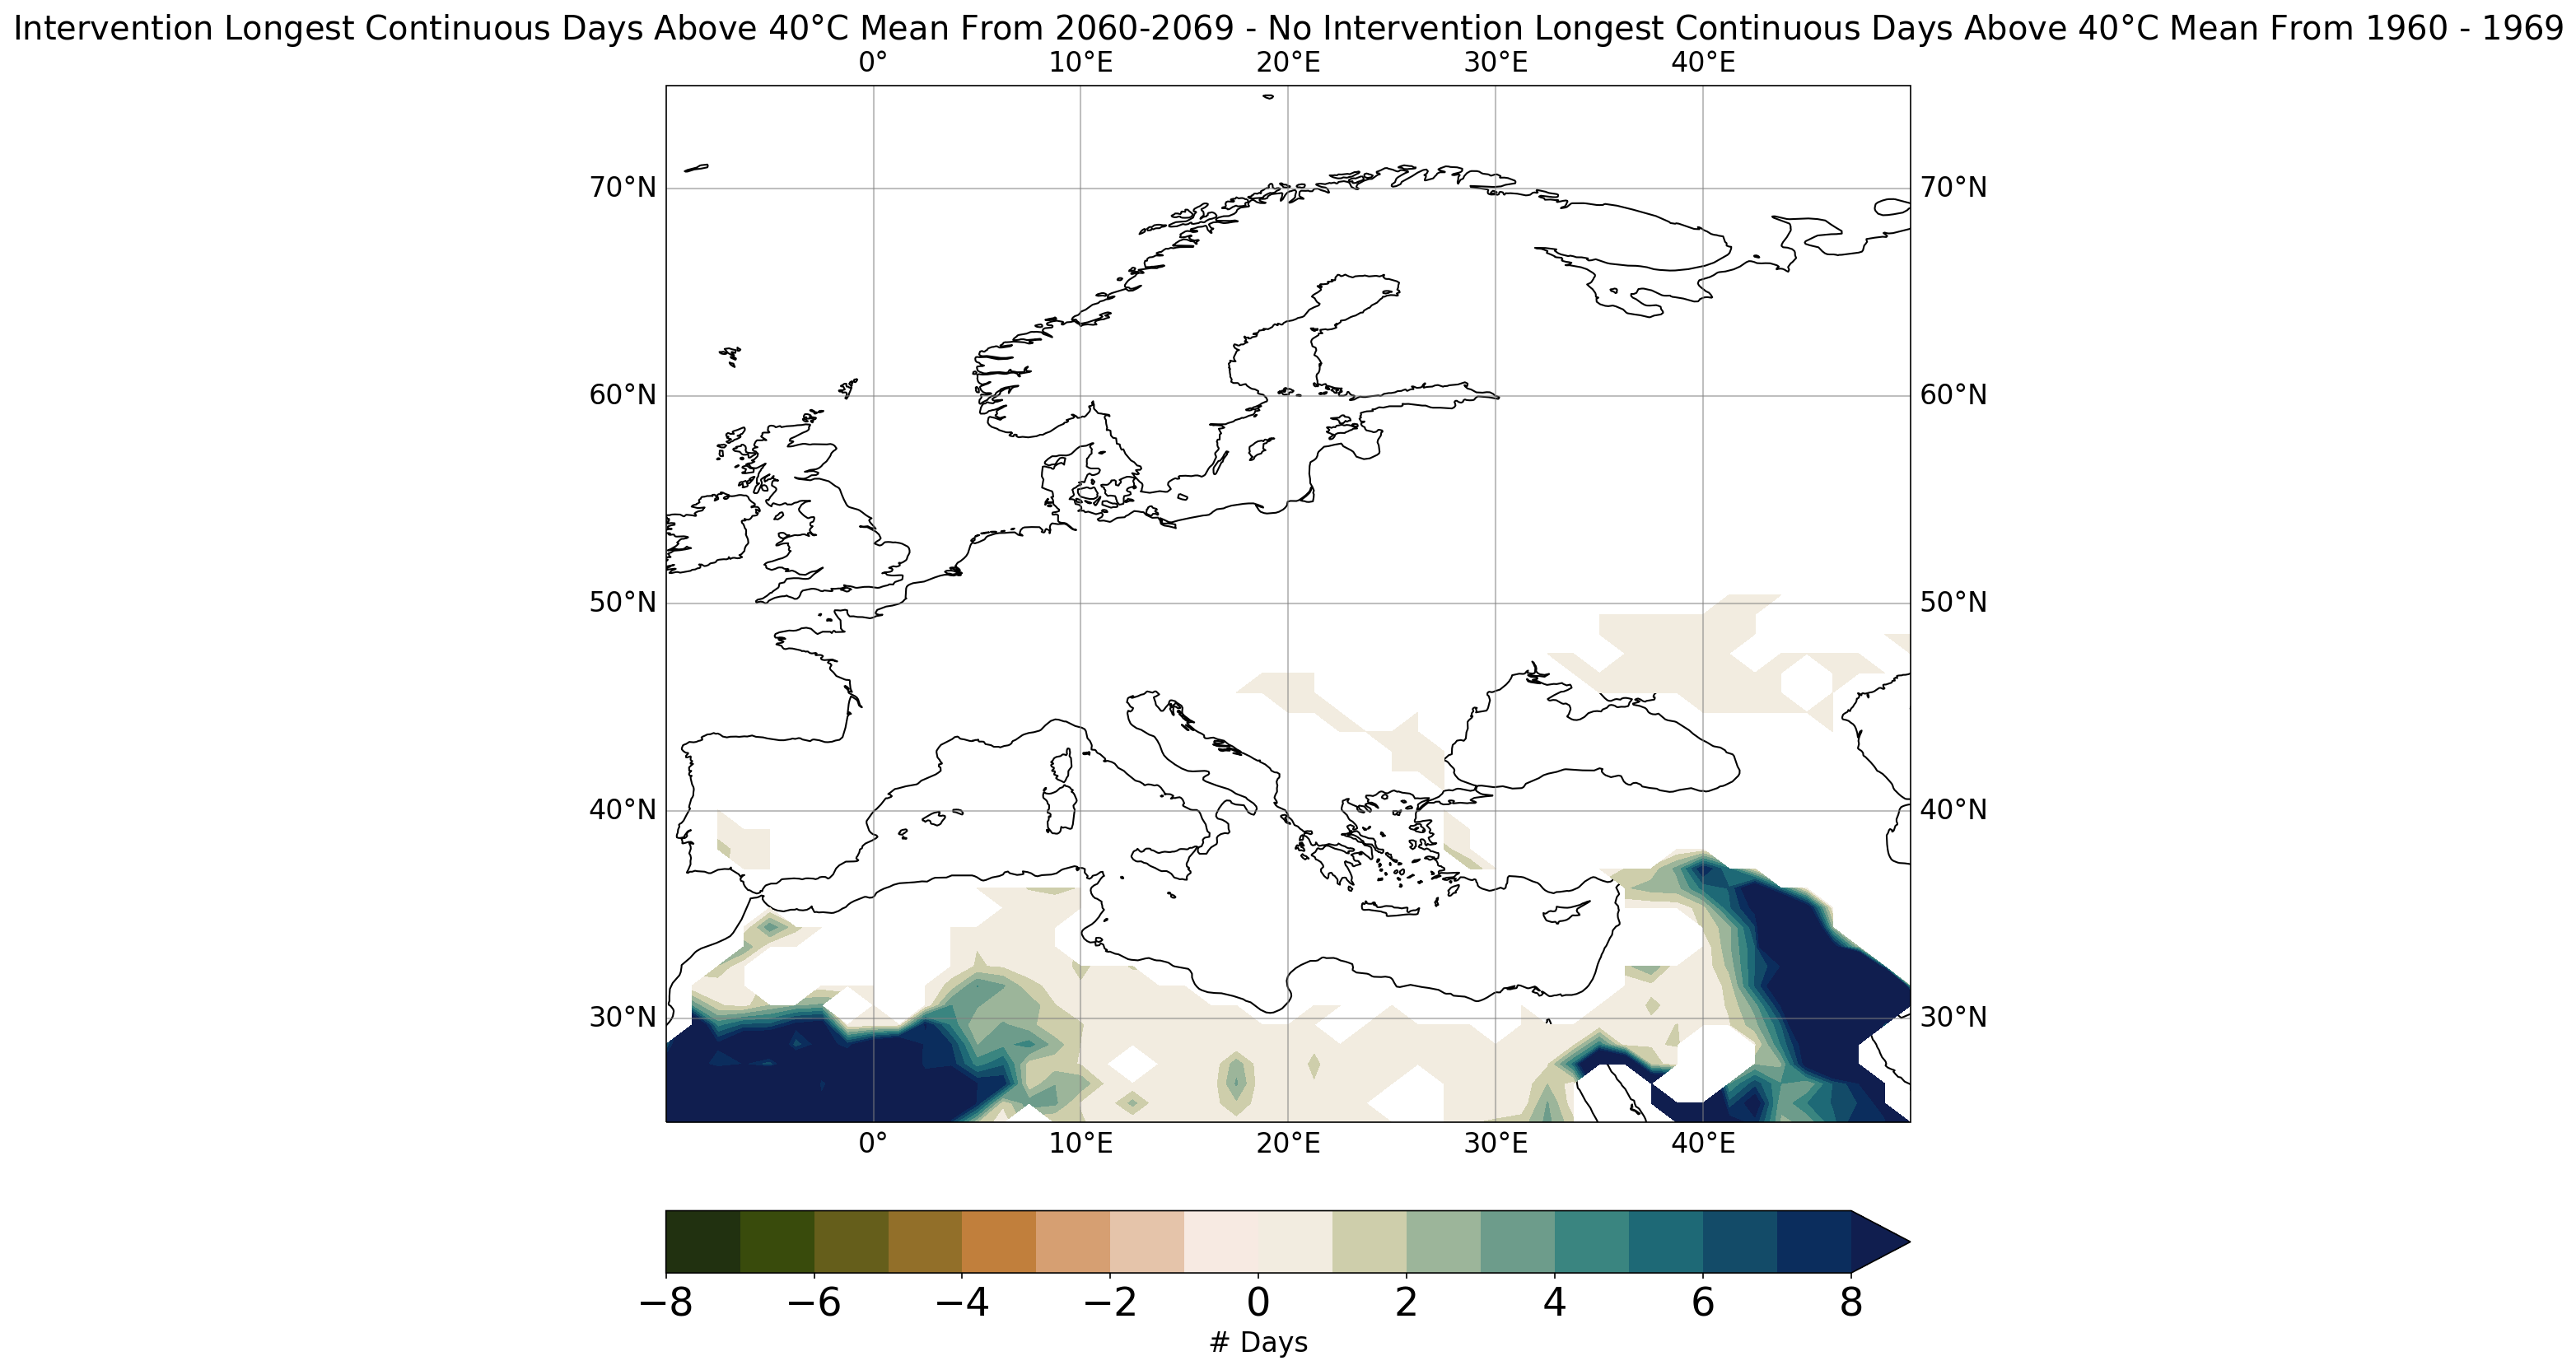

In [32]:
y = dataFile['lat']
plot, x  = add_cyclic_point(cont_days_above_40_future['arise_2060s_continuous_days_above_40_mean']-cesm_1960s_longest_days_mean,
                            coord=dataFile['lon'])
title = 'Intervention Longest Continuous Days Above 40$\degree$C Mean From 2060-2069 - No Intervention Longest Continuous Days Above 40$\degree$C Mean From 1960 - 1969'

plot_global(x,y,plot,anom_levs,title,'max',anomaly_cm)
plot_north_america(x,y,plot,NA_anom_levs,title,'max',anomaly_cm)
plot_europe(x,y,plot,EU_anom_levs,title,'max',anomaly_cm)

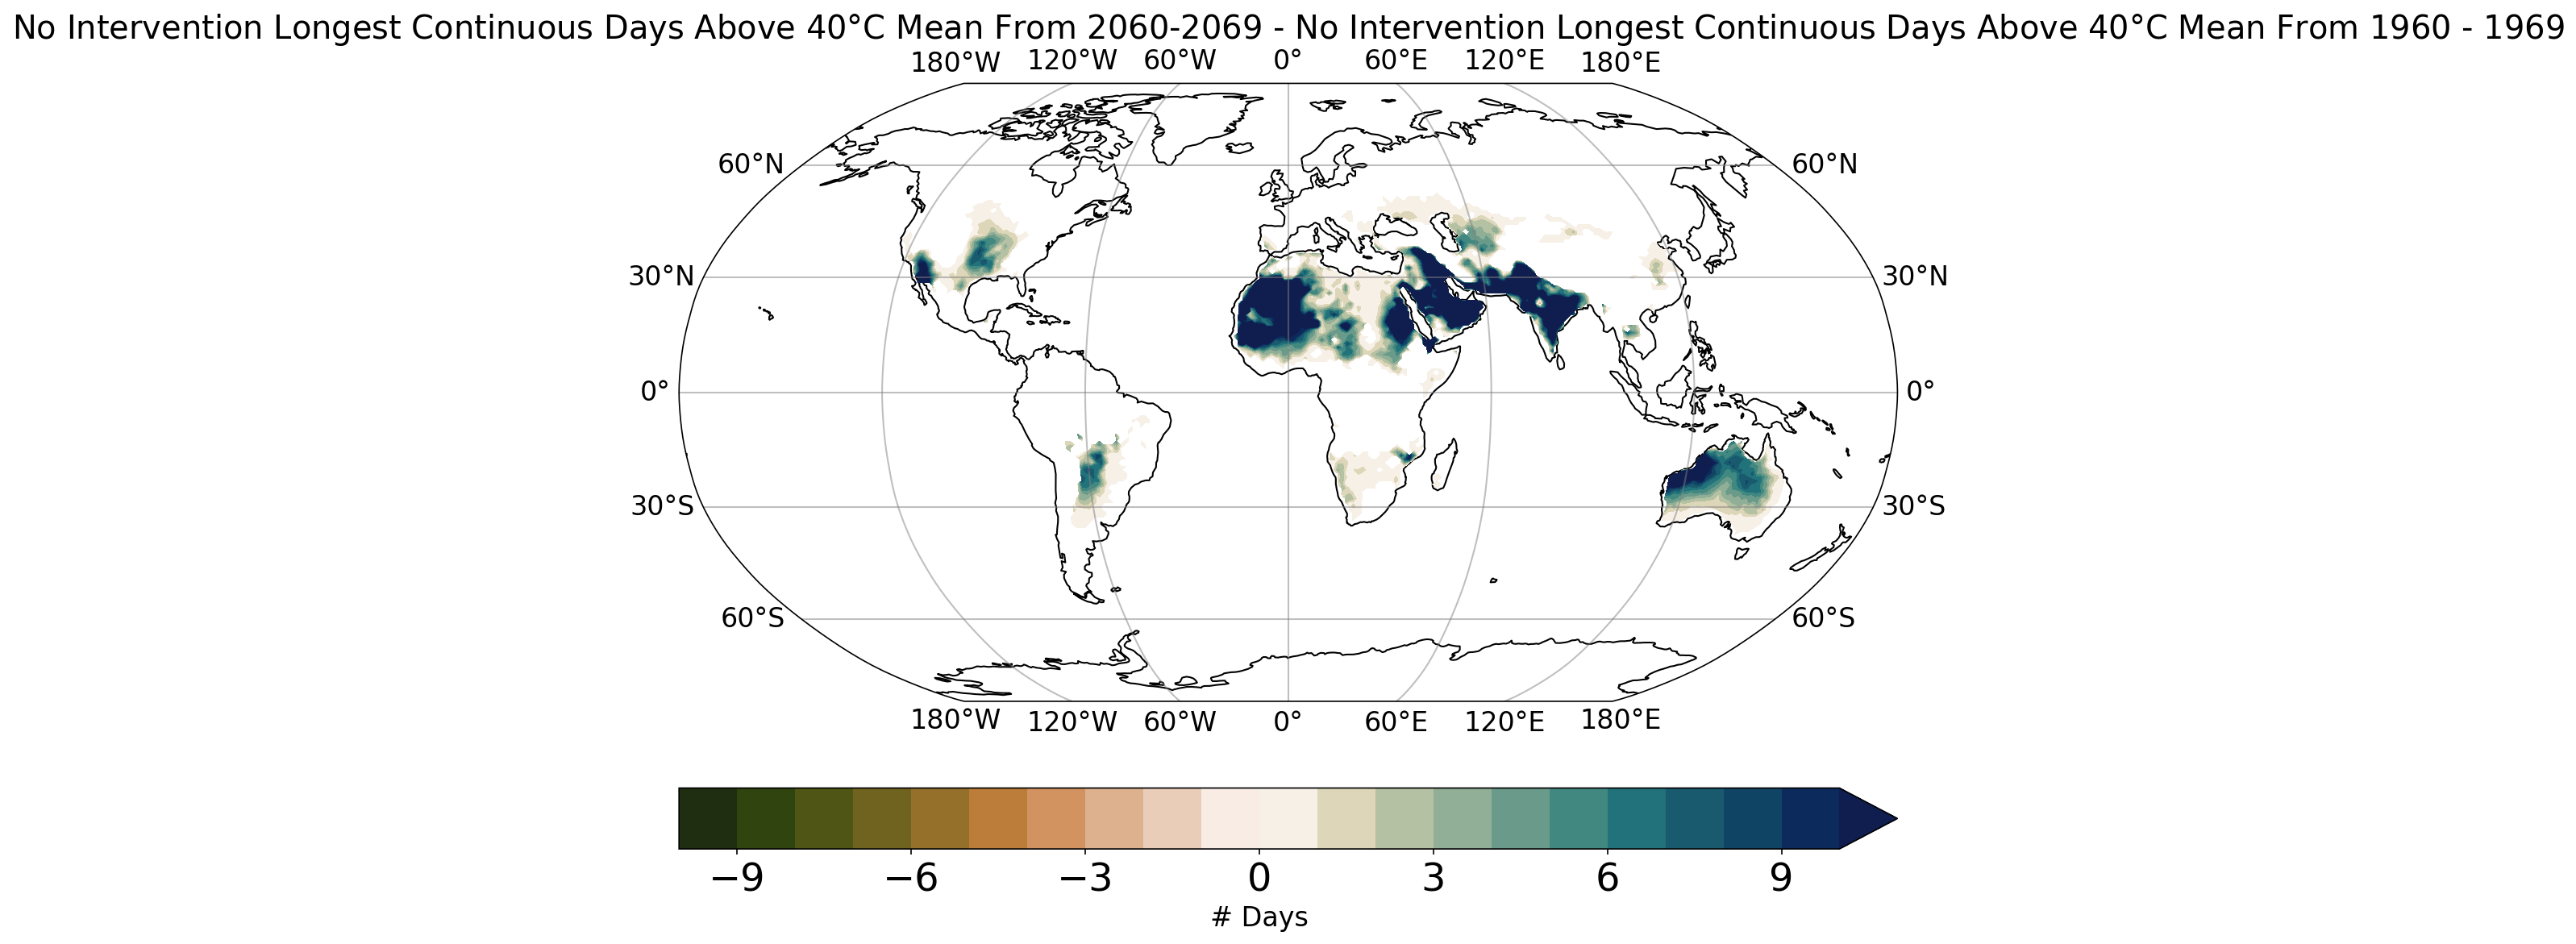

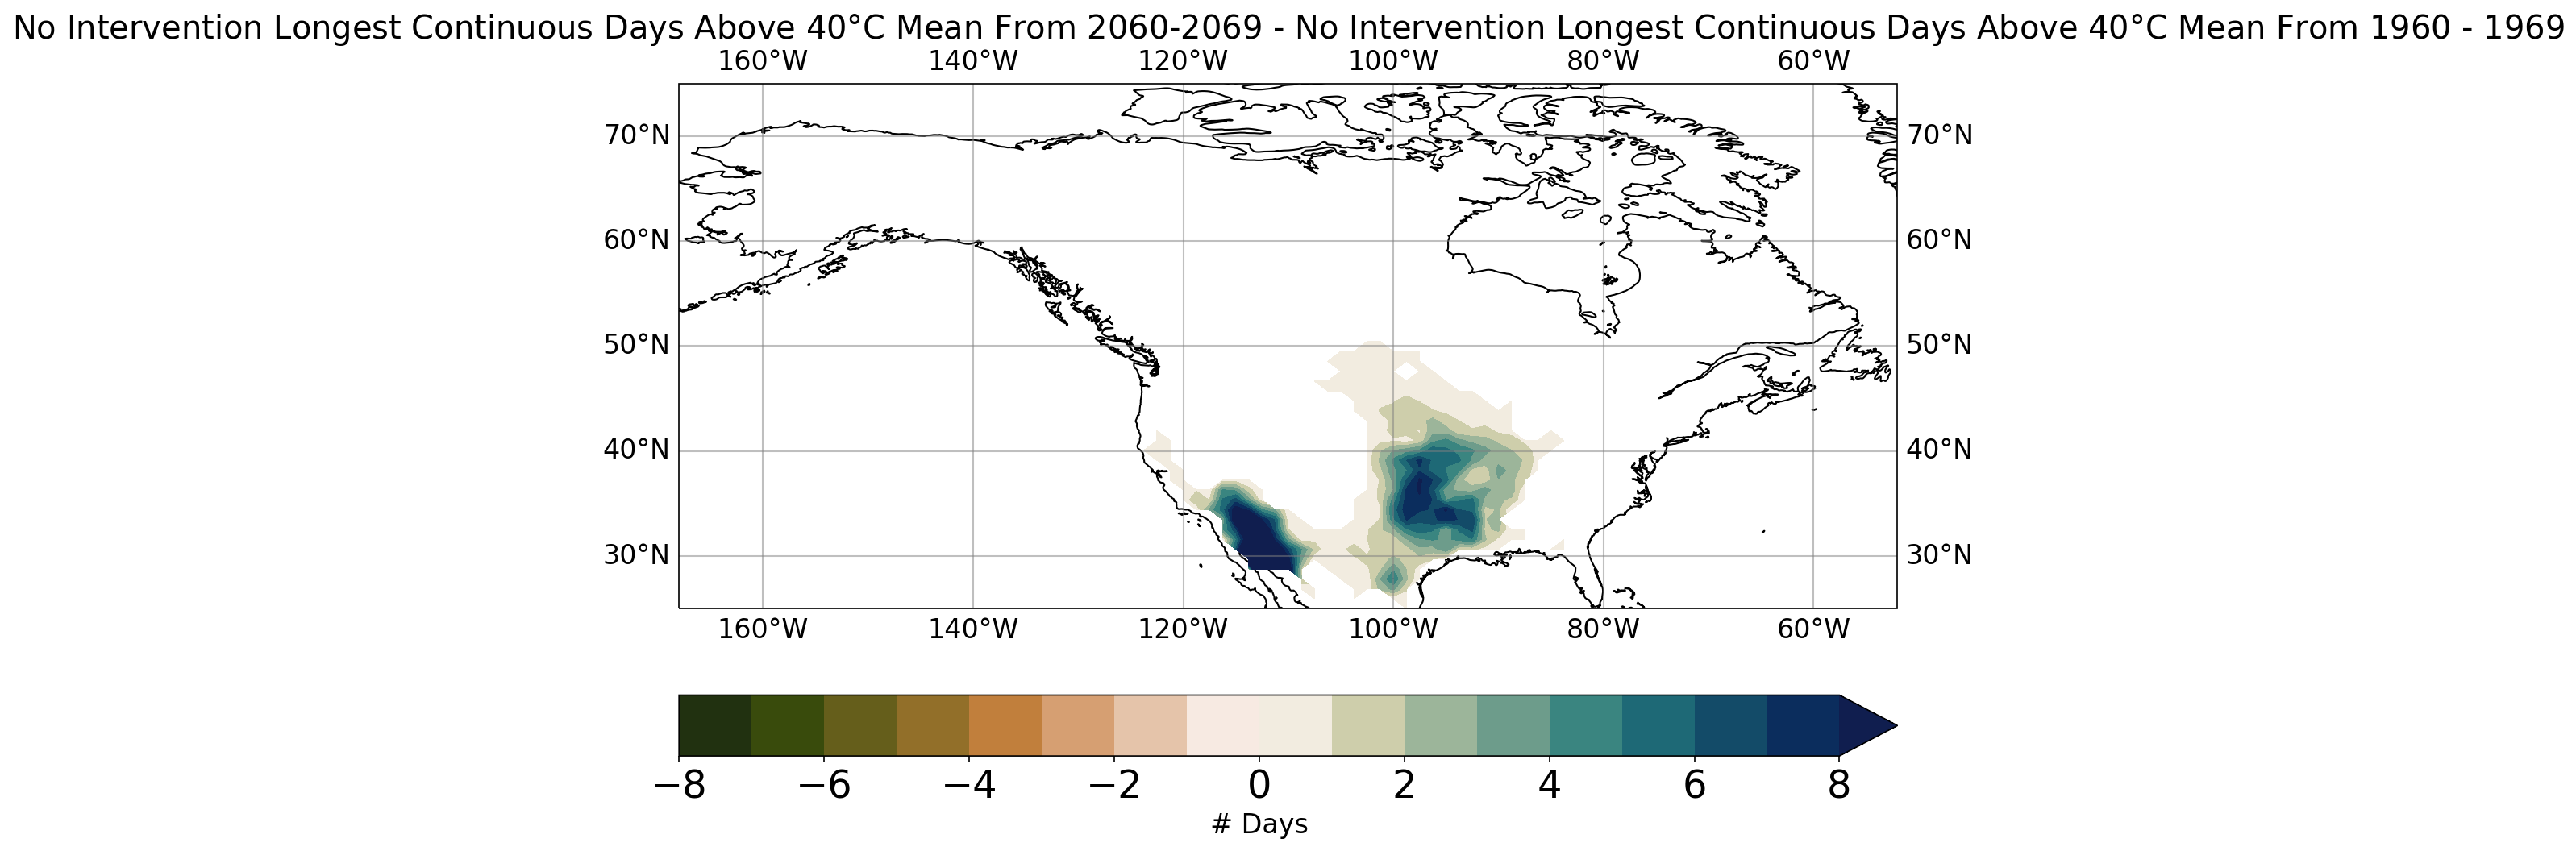

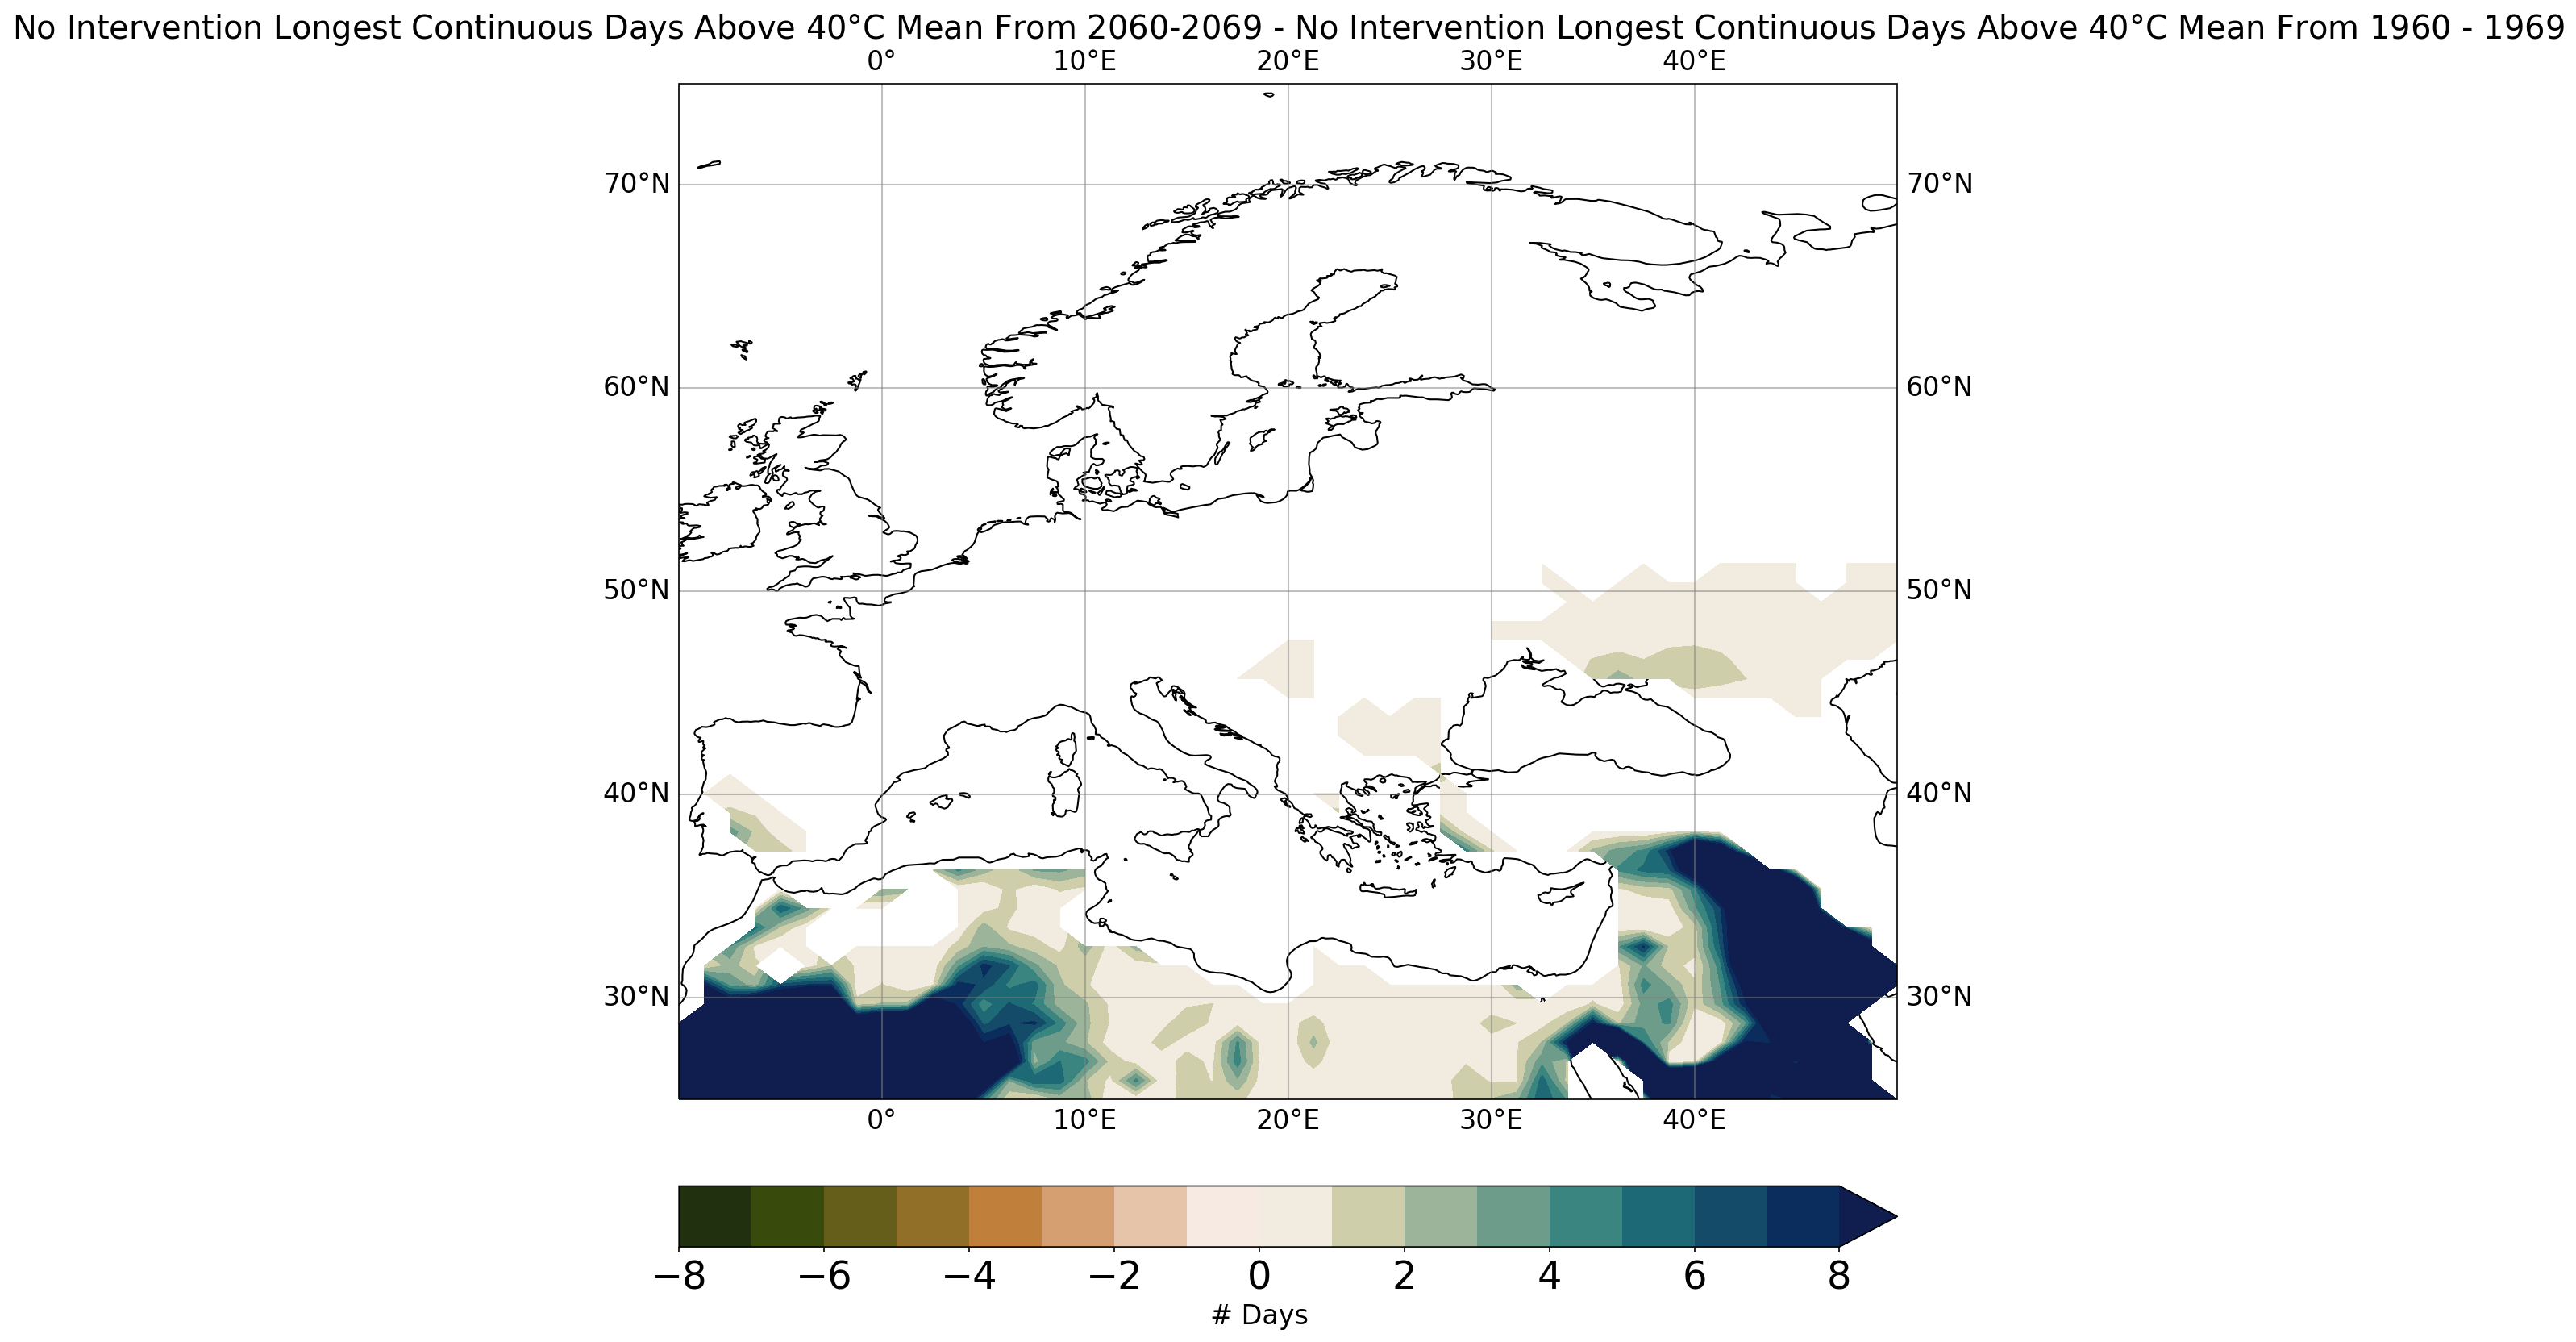

In [33]:
y = dataFile['lat']
plot, x  = add_cyclic_point(cont_days_above_40_future['cesm_2060s_continuous_days_above_40_mean']-cesm_1960s_longest_days_mean,
                            coord=dataFile['lon'])
title = 'No Intervention Longest Continuous Days Above 40$\degree$C Mean From 2060-2069 - No Intervention Longest Continuous Days Above 40$\degree$C Mean From 1960 - 1969'

plot_global(x,y,plot,anom_levs,title,'max',anomaly_cm)
plot_north_america(x,y,plot,NA_anom_levs,title,'max',anomaly_cm)
plot_europe(x,y,plot,EU_anom_levs,title,'max',anomaly_cm)